## **1. Latar Belakang**

Perkembangan transportasi perkotaan di Kota New York menuntut pengelolaan layanan taksi yang semakin efisien, adaptif, dan berbasis data. Tingginya mobilitas masyarakat, variasi waktu perjalanan, serta perbedaan karakteristik wilayah menyebabkan permintaan layanan taksi tidak merata baik dari sisi waktu, lokasi, maupun jenis perjalanan. Kondisi ini menuntut perusahaan dan vendor taksi untuk mampu mengoptimalkan operasional armada agar tetap kompetitif dan berkelanjutan.

Sebagai regulator dan penyedia data, NYC Taxi and Limousine Commission (NYC-TLC) memiliki peran strategis dalam menyediakan informasi yang dapat dimanfaatkan oleh vendor taksi untuk meningkatkan kinerja operasional dan pendapatan. Data perjalanan taksi yang tercatat oleh NYC-TLC menyimpan potensi besar untuk dianalisis guna memahami pola perjalanan, tren permintaan, distribusi wilayah, serta perilaku pembayaran penumpang.

Namun, dalam praktiknya, banyak vendor taksi masih menghadapi tantangan dalam menentukan waktu operasional optimal, penempatan armada yang tepat, serta strategi peningkatan pendapatan, khususnya terkait metode pembayaran dan jenis perjalanan yang paling menguntungkan. Tanpa analisis data yang komprehensif, pengambilan keputusan sering kali dilakukan secara intuitif dan kurang efisien.

Oleh karena itu, diperlukan suatu analisis berbasis data perjalanan taksi NYC-TLC untuk mengidentifikasi pola waktu, lokasi, dan pendapatan, serta menyusun rekomendasi strategis yang dapat digunakan oleh vendor taksi dalam mengoptimalkan operasional armada dan meningkatkan pendapatan.

## **2. Rumusan Masalah**

Berdasarkan latar belakang tersebut, maka rumusan masalah dalam analisis ini adalah sebagai berikut:

- Bagaimana pola dan tren perjalanan taksi di Kota New York selama Januari 2023 berdasarkan waktu harian dan mingguan?

- Pada waktu dan jam berapa permintaan perjalanan serta pendapatan taksi mencapai tingkat tertinggi?

- Wilayah mana saja yang menjadi lokasi penjemputan dan pengantaran dengan volume dan pendapatan tertinggi?

- Bagaimana distribusi pendapatan taksi berdasarkan metode pembayaran, kode tarif, dan jenis perjalanan?

- Bagaimana hubungan antara metode pembayaran dengan besaran tip yang diterima pengemudi?

- Insight strategis apa yang dapat diambil dari pola perjalanan dan pendapatan tersebut untuk mendukung pengambilan keputusan operasional vendor taksi?

- Rekomendasi apa yang dapat diberikan kepada vendor taksi agar dapat meningkatkan efisiensi armada dan pendapatan berbasis data NYC-TLC?

## **3. Data**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data catatan perjalanan TLC yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). 


Taksi Hijau: Secara hukum hanya boleh mengambil penumpang di wilayah luar Manhattan (The Bronx, Brooklyn, Queens, Staten Island) dan Manhattan bagian utara (di atas 96th St)

Dataset ini berisi informasi terkait rute perjalanan taksi TLC, ada 20 kolom didalam dataset NYC TLC Trip Record, yaitu:
- VendorID : Id penyedia LPEP 

    1 = Creative Mobile Technologies LLC. 

    2 = VeriFone Inc. 

- Waktu & Durasi:

    - lpep_pickup_datetime : Tanggal & waktu penjemputan
    - lpep_dropoff_datetime : Tanggal & waktu penumpang turun
    - Durasi_perjalanan: lpep_dropoff_datetime - lpep_pickup_datetime

- Lokasi (Taxi Zones):

    - PULocationID : Zona taksi TLC ketika penjemputan
    - DOLocationID : Zona taksi TLC ketika penumpang turun

- Detail Perjalanan:

    - Passenger_count : Jumlah penumpang dalam kendaraan
    - Trip_distance : Jarak tempuh (dalam mill)
    - RateCodeID : Kode tarif akhir perjalanan

        1 = Tarif standar   --> $3.00

        2 = Bandara John F. Kennedy (JFK)  --> $70.00

        3 = Bandara Newark (EWR) --> $20.00

        4 = Tarif luar kota Nassau / Westchester --> dua kali lipat tarif standar

        5 = Tarif negosiasi

        6 = Tarif perjalanan kelompok

    - Store_and_fwd_flag : Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor

        Y = Tidak disimpan dan teruskan

        N = Simpan dan teruskan

    - Payment_type : Kode yang menunjukkan jenis pembayaran yang di lakukan oleh penumpang

        1 = Kartu Kredit

        2 = Tunai

        3 = Gratis

        4 = Dispute

        5 = Tidak diketahui

        6 = Perjalanan dibatalkan

    - Trip_type : Kode yang menunjukkan jenis perjalanan

        1 = Street-hail

        2 = Dispatch

- Rincian Biaya:

    - Total_amount : Total biaya yang dibayar penumpang, selain tip tunai
    - Fare_amount : Tarif dasar perjalanan berdasarkan waktu/jarak (belum termasuk biaya tambahan)

        $0.50 = Waktu jam sibuk

        $1 = Waktu malam hari

    - MTA_tax : $ 0.50 Pajak otomatis yang dikenakan perpejalanan
    - Improvement_surcharge : $0.30 Biaya tambahan saat menurunkan penumpang diwaktu hujan, peraturan dimutai ditetapkan pada tahun 2015
    - Tip_amount : Jumlah tip yang tercatat saat menggunakan kartu kredit, tip tunai tidak termasuk
    - Tolls_amount : Jumlah total biaya tol yang digunakan dalam perjalanan
    - extra : Biaya tambahan lainnya, seperti jam sibuk atau tengah malam

        $5.00 untuk jam sibuk (jam 16.00 - 20.00 pada hari kerja, tidak termasuk libur nasional)

    - congestion_surcharge : 
        - biaya tambahan karena kemacetan, yang dimulai/berakhir/melewati Manhattan diselatan jalan ke-96

            taksi kuning : $2.50

            taksi hijau : $2.75 / FWV

            semua perjalanan berbagi tumpangan : $0.75
    - ehail_fee : Biaya pemesanan

Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record.

In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium

# setting agar bisa menampilkan semua kolom
pd.set_option("display.max_columns",None)

In [1156]:
df= pd.read_csv("C:/Users/HP/Downloads/Projek Modul 2/NYC TLC Trip Record.csv")
display(df.head(), df.tail())

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\4196828646.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/HP/Downloads/Projek Modul 2/NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## **4. Data Understanding and Cleaning**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [1157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Jumlah baris dan kolom di dataset df adalah (68211, 20)

- **cek data unik di setiap kolom**

In [1158]:
pd.set_option('display.max_colwidth', 1)

# data unik di tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

- **Missing Value**

In [1159]:
# Cek duplicated 

df.duplicated().sum()  # tidak ada data yang duplikat

np.int64(0)

In [1160]:
# Cek ada berapa data yang missing value di tiap kolomnya

df.isna().sum()  

VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
dtype: int64

In [1161]:
# Persentase missing value di tiap kolo

df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

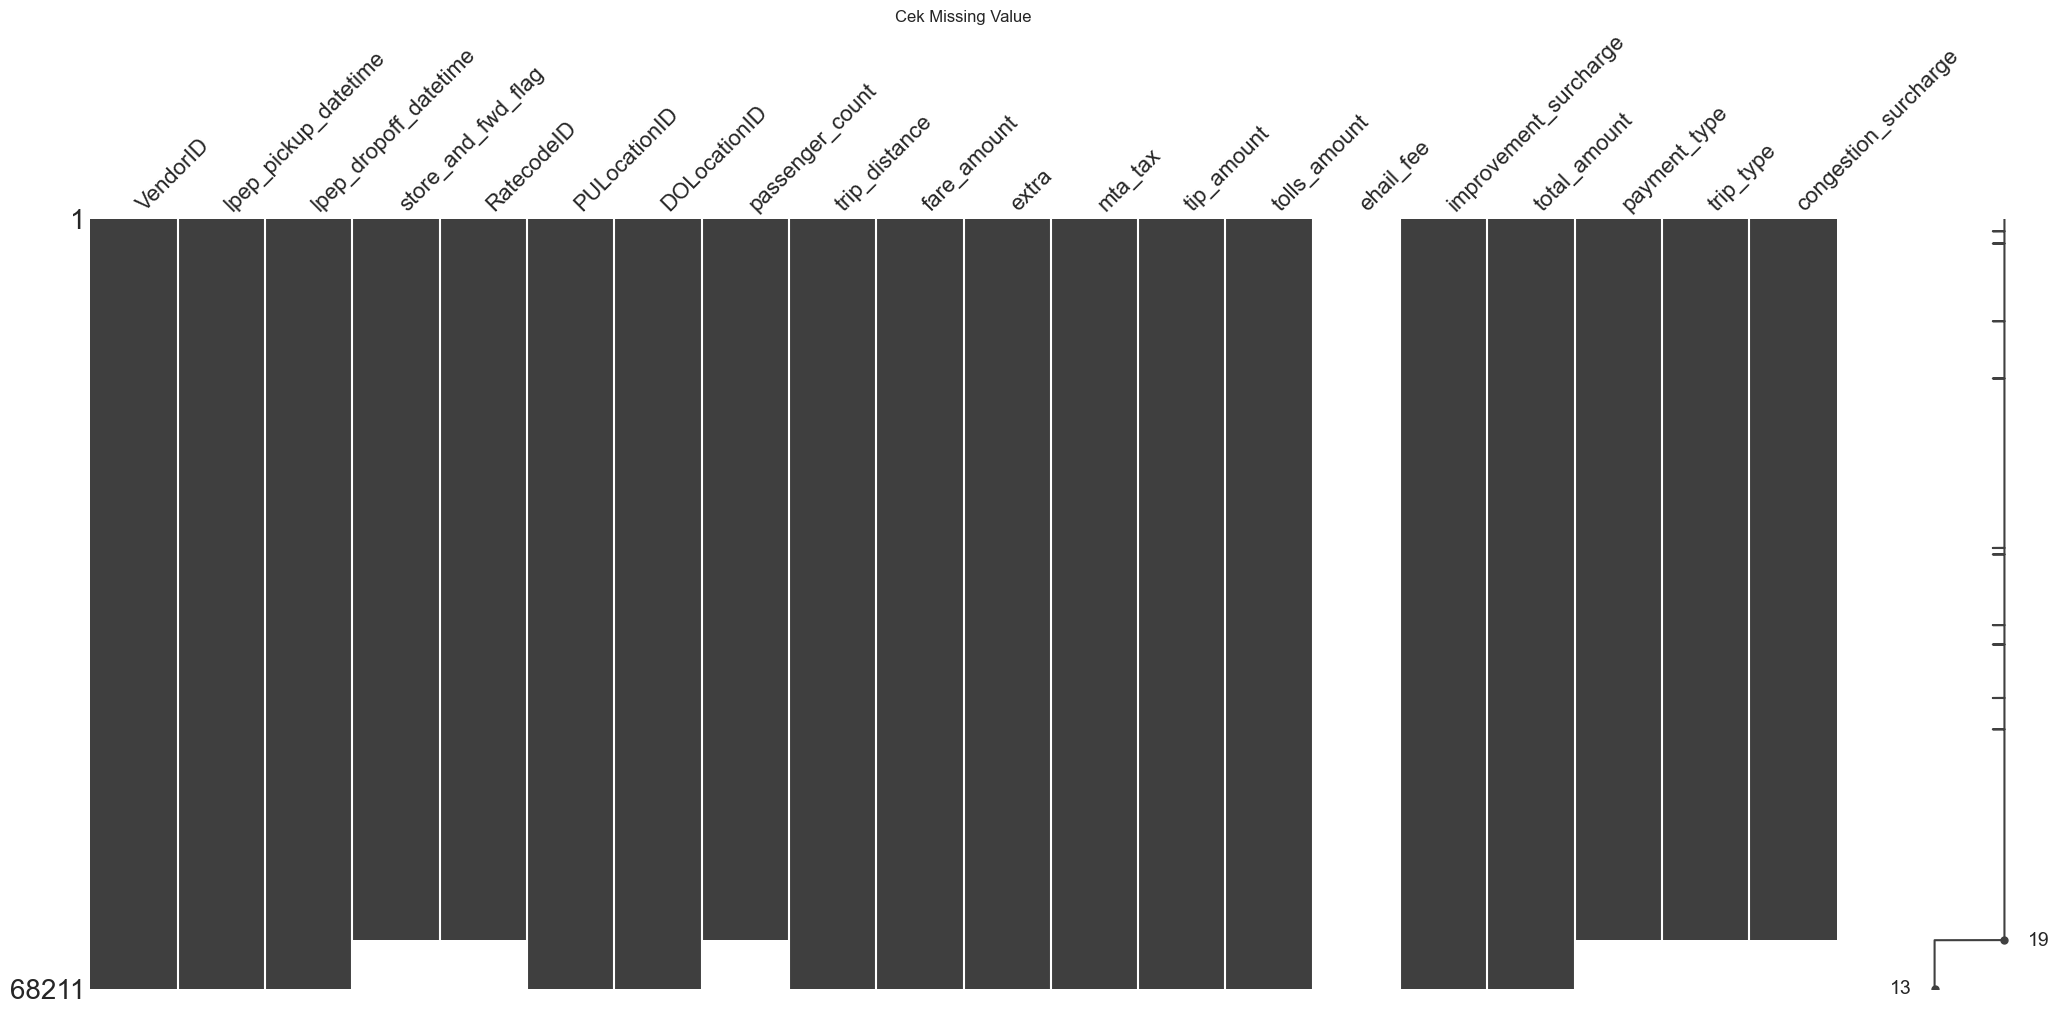

In [1162]:
# cek posisi missing value

ms.matrix(df)
plt.title("Cek Missing Value")
plt.show()

Secara garis besar:

- kolom `ehail_fee` tidak memiliki nilai sehingga boleh di hapus kolomnya.
- beberapa kolom seperti `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki *missing value* yang cukup rendah <10% dan memiliki posisi yang cenderung sama.
- kolom `RatecodeID` memiliki data bernilai 99 yang bukan termasuk klasifikasi data dikolom tersebut.
- kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki type data object yang seharusnya memiliki type data datetime sehingga harus dirubah terlebih dahulu.

###  **Data Cleaning**

- **Kolom ehail_fee**

In [1163]:
# Drop kolom ehail_fee karena tidak memiliki nilai

df.drop(columns= "ehail_fee", inplace= True)

- **Kolom lpep_pickup_datetime & lpep_dropoff_datetime**

In [1164]:
# Mengubah type data pada lpep_pickup_datetime & lpep_dropoff_datetime

df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [1165]:
# Melihat rentang data pertahunnya

df.groupby(df["lpep_pickup_datetime"].dt.year).size()

lpep_pickup_datetime
2009    1    
2022    2    
2023    68208
dtype: int64

In [1166]:
# Melihat data perbulan

df.groupby(df["lpep_pickup_datetime"].dt.month).size()

lpep_pickup_datetime
1     68208
2     1    
12    2    
dtype: int64

In [1167]:
# Melihat data pertahunnya

df.groupby(df["lpep_dropoff_datetime"].dt.year).size()

lpep_dropoff_datetime
2009    1    
2022    2    
2023    68208
dtype: int64

In [1168]:
# Melihat data perbulan

df.groupby(df["lpep_dropoff_datetime"].dt.month).size()

lpep_dropoff_datetime
1     68193
2     16   
12    2    
dtype: int64

In [1169]:
df[df["lpep_dropoff_datetime"].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.00,0.0,0.0,5.66,0.0,0.3,33.96,1.0,2.0,0.00
61992,2,2023-01-31 08:46:26,2023-02-01 07:34:55,N,1.0,116,161,1.0,5.66,32.40,0.0,0.5,5.50,0.0,1.0,42.15,1.0,1.0,2.75
62120,2,2023-01-31 09:02:52,2023-02-01 09:01:47,N,1.0,41,42,1.0,0.87,7.90,0.0,0.5,0.00,0.0,1.0,9.40,1.0,1.0,0.00
62148,2,2023-01-31 09:53:33,2023-02-01 00:00:00,N,1.0,7,226,1.0,1.35,9.30,0.0,0.5,0.00,0.0,1.0,10.80,2.0,1.0,0.00
62510,2,2023-01-31 12:41:35,2023-02-01 12:05:19,N,1.0,75,42,1.0,2.17,12.80,0.0,0.5,0.00,0.0,1.0,14.30,2.0,1.0,0.00
62591,2,2023-01-31 13:58:22,2023-02-01 11:46:10,N,1.0,130,130,1.0,0.10,3.70,0.0,0.5,0.00,0.0,1.0,5.20,2.0,1.0,0.00
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1.0,244,43,3.0,5.74,31.00,0.0,0.5,0.00,0.0,0.3,34.55,1.0,1.0,2.75
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1.0,92,64,2.0,9.15,39.40,0.0,0.5,4.09,0.0,1.0,44.99,1.0,1.0,0.00
63105,2,2023-01-31 17:45:46,2023-02-01 17:27:05,N,1.0,43,151,1.0,0.75,5.80,2.5,0.5,2.45,0.0,1.0,12.25,1.0,1.0,0.00
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1.0,82,82,1.0,1.46,10.70,2.5,0.5,0.00,0.0,1.0,14.70,2.0,1.0,0.00


- karena data `lpep_pickup_datetime` & `lpep_dropoff_datetime` pada tahun 2009 dan 2022 tidak lengkap, maka kita hapus dan hanya tahun 2023 yang akan kita gunakan

- karena data `lpep_pickup_datetime` perbulan hanya bulan januari yang lengkap, maka kita hapus sisa bulan yang lainnya

- untuk `lpep_dropoff_datetime`kita buang bulan ke 12 karena anomali, sedangkan bulan ke kedua lanjutan dari `lpep_pickup_datetime`bulan 1

In [1170]:
df = df[df["lpep_pickup_datetime"].dt.year == 2023]

In [1171]:
df = df[df["lpep_dropoff_datetime"].dt.year == 2023]

In [1172]:
df = df[df["lpep_pickup_datetime"].dt.month == 1]

In [1173]:
df = df[df["lpep_dropoff_datetime"].dt.month != 12]

In [1174]:
df["lpep_dropoff_datetime"].dt.month.unique()

array([1, 2], dtype=int32)

In [1175]:
df["lpep_pickup_datetime"].dt.month.unique()

array([1], dtype=int32)

- **store_and_fwd_flag**

In [1176]:
df["store_and_fwd_flag"].mode()

0    N
Name: store_and_fwd_flag, dtype: object

karena modusnya adalah N, nilai null pada store_and_fwd_flag bisa diisi dengan N

In [1177]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0])

- **passenger_count**

In [1178]:
df["passenger_count"].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [1179]:
df["passenger_count"].median()

np.float64(1.0)

In [1180]:
df.groupby("trip_type")["passenger_count"].median()

trip_type
1.0    1.0
2.0    1.0
Name: passenger_count, dtype: float64

In [1181]:
df.groupby("RatecodeID")["passenger_count"].median()

RatecodeID
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
99.0    1.0
Name: passenger_count, dtype: float64

kita ambil nilai median untuk jumlah penumpang

In [1182]:
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median())

- **payment_type**

In [1183]:
# kalo ada data tip artinya dia membayar menggunakan kartu kredit
df[["payment_type", "tip_amount"]]  

,payment_type,tip_amount
0,1.0,4.03
1,1.0,2.64
2,1.0,1.94
3,1.0,1.70
4,1.0,0.00
...,...,...
68206,NaN,0.00
68207,NaN,0.00
68208,NaN,3.51
68209,NaN,3.20


In [1184]:
df.loc[(df["payment_type"].isnull()) & (df["tip_amount"] != 0),"payment_type"] = 1

In [1185]:
df["payment_type"] = df["payment_type"].fillna(5)

- **trip_type** 

In [1186]:
df["trip_type"].mode()[0]

np.float64(1.0)

In [1187]:
df["trip_type"] = df["trip_type"].fillna(df["trip_type"].mode()[0])

- **congestion_surcharge**

In [1188]:
df["congestion_surcharge"].unique()

array([ 2.75,  0.  ,  2.5 , -2.75,   nan])

karena ini data taksi hijau, maka congestion_surcharge berniali $2.75 jika melewati/turun/naik(hanyak Manhattan bagian utara (di atas 96th St)) di Manhattan

In [1189]:
# congestion_surcharge bernilai $2.5 untuk taksi kuning sehingga kita hapus saja

congestion_surcharge_kuning = df[df["congestion_surcharge"] == 2.5]
congestion_surcharge_kuning

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2497,2,2023-01-02 19:16:36,2023-01-02 19:30:21,N,1.0,114,162,1.0,2.49,15.6,0.0,0.5,3.92,0.00,1.0,23.52,1.0,1.0,2.5
2498,2,2023-01-02 19:49:45,2023-01-02 19:57:56,N,1.0,236,41,1.0,2.26,12.1,0.0,0.5,2.00,0.00,1.0,18.10,1.0,1.0,2.5
2691,2,2023-01-02 22:15:33,2023-01-02 22:25:11,N,1.0,236,238,1.0,1.71,12.1,1.0,0.5,3.42,0.00,1.0,20.52,1.0,1.0,2.5
2902,2,2023-01-03 07:49:18,2023-01-03 08:10:44,N,1.0,74,140,1.0,3.54,21.2,0.0,0.5,5.04,0.00,1.0,30.24,1.0,1.0,2.5
3016,2,2023-01-03 08:43:00,2023-01-03 08:59:42,N,1.0,74,236,1.0,1.97,16.3,0.0,0.5,4.06,0.00,1.0,24.36,1.0,1.0,2.5
8698,2,2023-01-05 18:55:20,2023-01-05 19:08:33,N,1.0,244,151,1.0,4.73,21.9,2.5,0.5,4.83,0.00,1.0,33.23,1.0,1.0,2.5
9633,2,2023-01-06 09:32:58,2023-01-06 09:57:17,N,1.0,43,246,1.0,4.79,25.4,0.0,0.5,3.00,0.00,1.0,32.40,1.0,1.0,2.5
9995,2,2023-01-06 12:38:54,2023-01-06 13:06:32,N,1.0,56,162,2.0,7.30,35.9,0.0,0.5,7.98,0.00,1.0,47.88,1.0,1.0,2.5
14200,2,2023-01-08 12:29:11,2023-01-08 12:41:26,N,1.0,74,262,1.0,2.61,14.9,0.0,0.5,0.00,0.00,1.0,18.90,1.0,1.0,2.5
15352,2,2023-01-09 06:53:22,2023-01-09 07:01:01,N,1.0,75,236,1.0,1.60,10.0,0.0,0.5,3.50,0.00,1.0,17.50,1.0,1.0,2.5


In [1190]:
df = df[df["congestion_surcharge"] != 2.5]

Karena kebijakan congestion_surcharge bernilai $2.5 hanya untuk taksi kuning, terdapat 16 baris kolom `congestion_surcharge == 2.5` yang kita hapus.

In [1191]:
# Cek data yang bernilai negatif

df[(df["total_amount"]<0)| (df["fare_amount"]<0) |(df["mta_tax"]<0)|(df["improvement_surcharge"]<0)|(df["tip_amount"]<0) |(df["tolls_amount"]<0) |(df["extra"]<0) |(df["congestion_surcharge"]<0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,N,NaN,25,25,1.0,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,1.0,1.0,NaN
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,N,NaN,116,151,1.0,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,1.0,1.0,NaN
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,N,NaN,168,159,1.0,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,1.0,1.0,NaN
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,N,NaN,166,166,1.0,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,1.0,1.0,NaN


Jika diperhatikan dari beberapa baris data terdapat data yang bernilai negatif, diketahui bahwa

`total_amount` = `fare_amount`+ `mta_tax`+ `improvement_surcharge`+ `tip_amount`+ `tolls_amount`+ `extra`+ `congestion_surcharge`

maka nilai minus akan di absolutkan, karena nilai tersebut merupakan biaya yang dikeluarkan oleh penumpang.

In [1192]:
df.iloc[:, 9:19] = (df.iloc[:, 9:19]).abs()

- **RatecodeID**

Karena posisi missing value `RatecodeID` dan `congestion_surcharge` cenderung sama dan persentase missing valuenya adalah 6.3% < 10% dari data maka boleh dihapus langsung.

In [1193]:
# menghapus baris yang missing
df.dropna(inplace= True)

In [1194]:
df["RatecodeID"].mode()

0    1.0
Name: RatecodeID, dtype: float64

In [1195]:
# data yang bernilai 99 pada RatecodeID diganti menjadi 1= Standard rate
df['RatecodeID'] = df['RatecodeID'].replace(99.0, df['RatecodeID'].mode()[0])

In [1196]:
# Cek data unik di tiap kolom, sudah tidak ada data yang bernilai negatif dan NaN

pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,62657,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,62593,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Sebelum dibersihkan, kita memiliki 68,210 baris data, sekarang kita memiliki 63,886 baris. Sekitar 4,324 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

- **Membuat kolom baru**

`trip_durasi` = `lpep_dropoff_datetime` - `lpep_pickup_datetime`

In [1197]:
# trip_durasi = df["lpep_dropoff_datetime"]- df["lpep_pickup_datetime"]

**Dataset baru untuk map PULocation & DOLocation**

data didapat dari https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1198]:
df_map = pd.read_csv("C:/Users/HP/Downloads/Projek Modul 2/taxi_zone_lookup.csv")
df_map.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [1199]:
df_map["service_zone"].unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [1200]:
df_map["Borough"].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown', nan], dtype=object)

In [1201]:
df_map.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [1202]:
# menghapus data yang mengandung missing
df_map.dropna(inplace= True)

- **Marge dataset**

In [1203]:
# Marge untuk lokasi DOLocationID
df = pd.merge(df, df_map, left_on= "DOLocationID", right_on= "LocationID")

In [1204]:
# Rename kolom untuk DOLocationID
df = df.rename(columns= {"Borough" : "DO_Borough",
                         "Zone" : "DO_Zone",
                         "service_zone" : "DO_service_zone"})

# Hapus kolom LocationID
df = df.drop(columns= "LocationID")

In [1205]:
# Marge untuk lokasi PULocationID
df = pd.merge(df, df_map, left_on= "PULocationID", right_on= "LocationID")

In [1206]:
# Rename kolom untuk PULocationID
df = df.rename(columns= {"Borough" : "PU_Borough",
                         "Zone" : "PU_Zone",
                         "service_zone" : "PU_service_zone"})

# Hapus kolom LocationID
df = df.drop(columns= "LocationID")

### **Descriptive Statistic**

In [1207]:
display(df.describe(), df.describe(include='object'))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63175.000000,63175,63175,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000,63175.000000
mean,1.856478,2023-01-16 22:38:24.929307392,2023-01-16 22:56:20.517736448,1.083831,97.090162,137.044369,1.317072,2.552069,15.898759,0.890859,0.631322,2.035530,0.139256,0.955090,21.041554,1.373217,1.018140,0.734044
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:37:23,2023-01-09 12:53:02,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:51:12,2023-01-17 09:06:24,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.450000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:22:38.500000,2023-01-24 16:38:42,1.000000,116.000000,216.000000,1.000000,3.040000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.300000,2.000000,1.000000,2.750000
max,2.000000,2023-01-31 23:58:23,2023-02-01 17:27:05,5.000000,263.000000,263.000000,9.000000,1571.970000,490.000000,7.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.350607,NaN,NaN,0.565046,59.437253,76.189067,0.980674,6.730766,12.455930,1.291821,0.359884,2.923161,0.981143,0.173616,14.312619,0.507553,0.133459,1.216480


,store_and_fwd_flag,DO_Borough,DO_Zone,DO_service_zone,PU_Borough,PU_Zone,PU_service_zone
count,63175,63175,63175,63175,63175,63175,63175
unique,2,6,245,4,5,216,3
top,N,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
freq,62893,37356,3415,41026,37341,12918,59244


Pada deskriptif data terlihat bahwa:

- Top lokasi penjemputan adalah PU_Zone 216 East Harlem North, Manhattan dengan total 12918 perjalanan
- Top lokasi pengantaran adalah DO_Zone 245 East Harlem North, Manhattan dengan total 3415 perjalanan
- Rata- rata total biaya yang dibayarkan penumpang adalah $21.04
- Rata-rata jarak tempuh adalah 2.5 mill

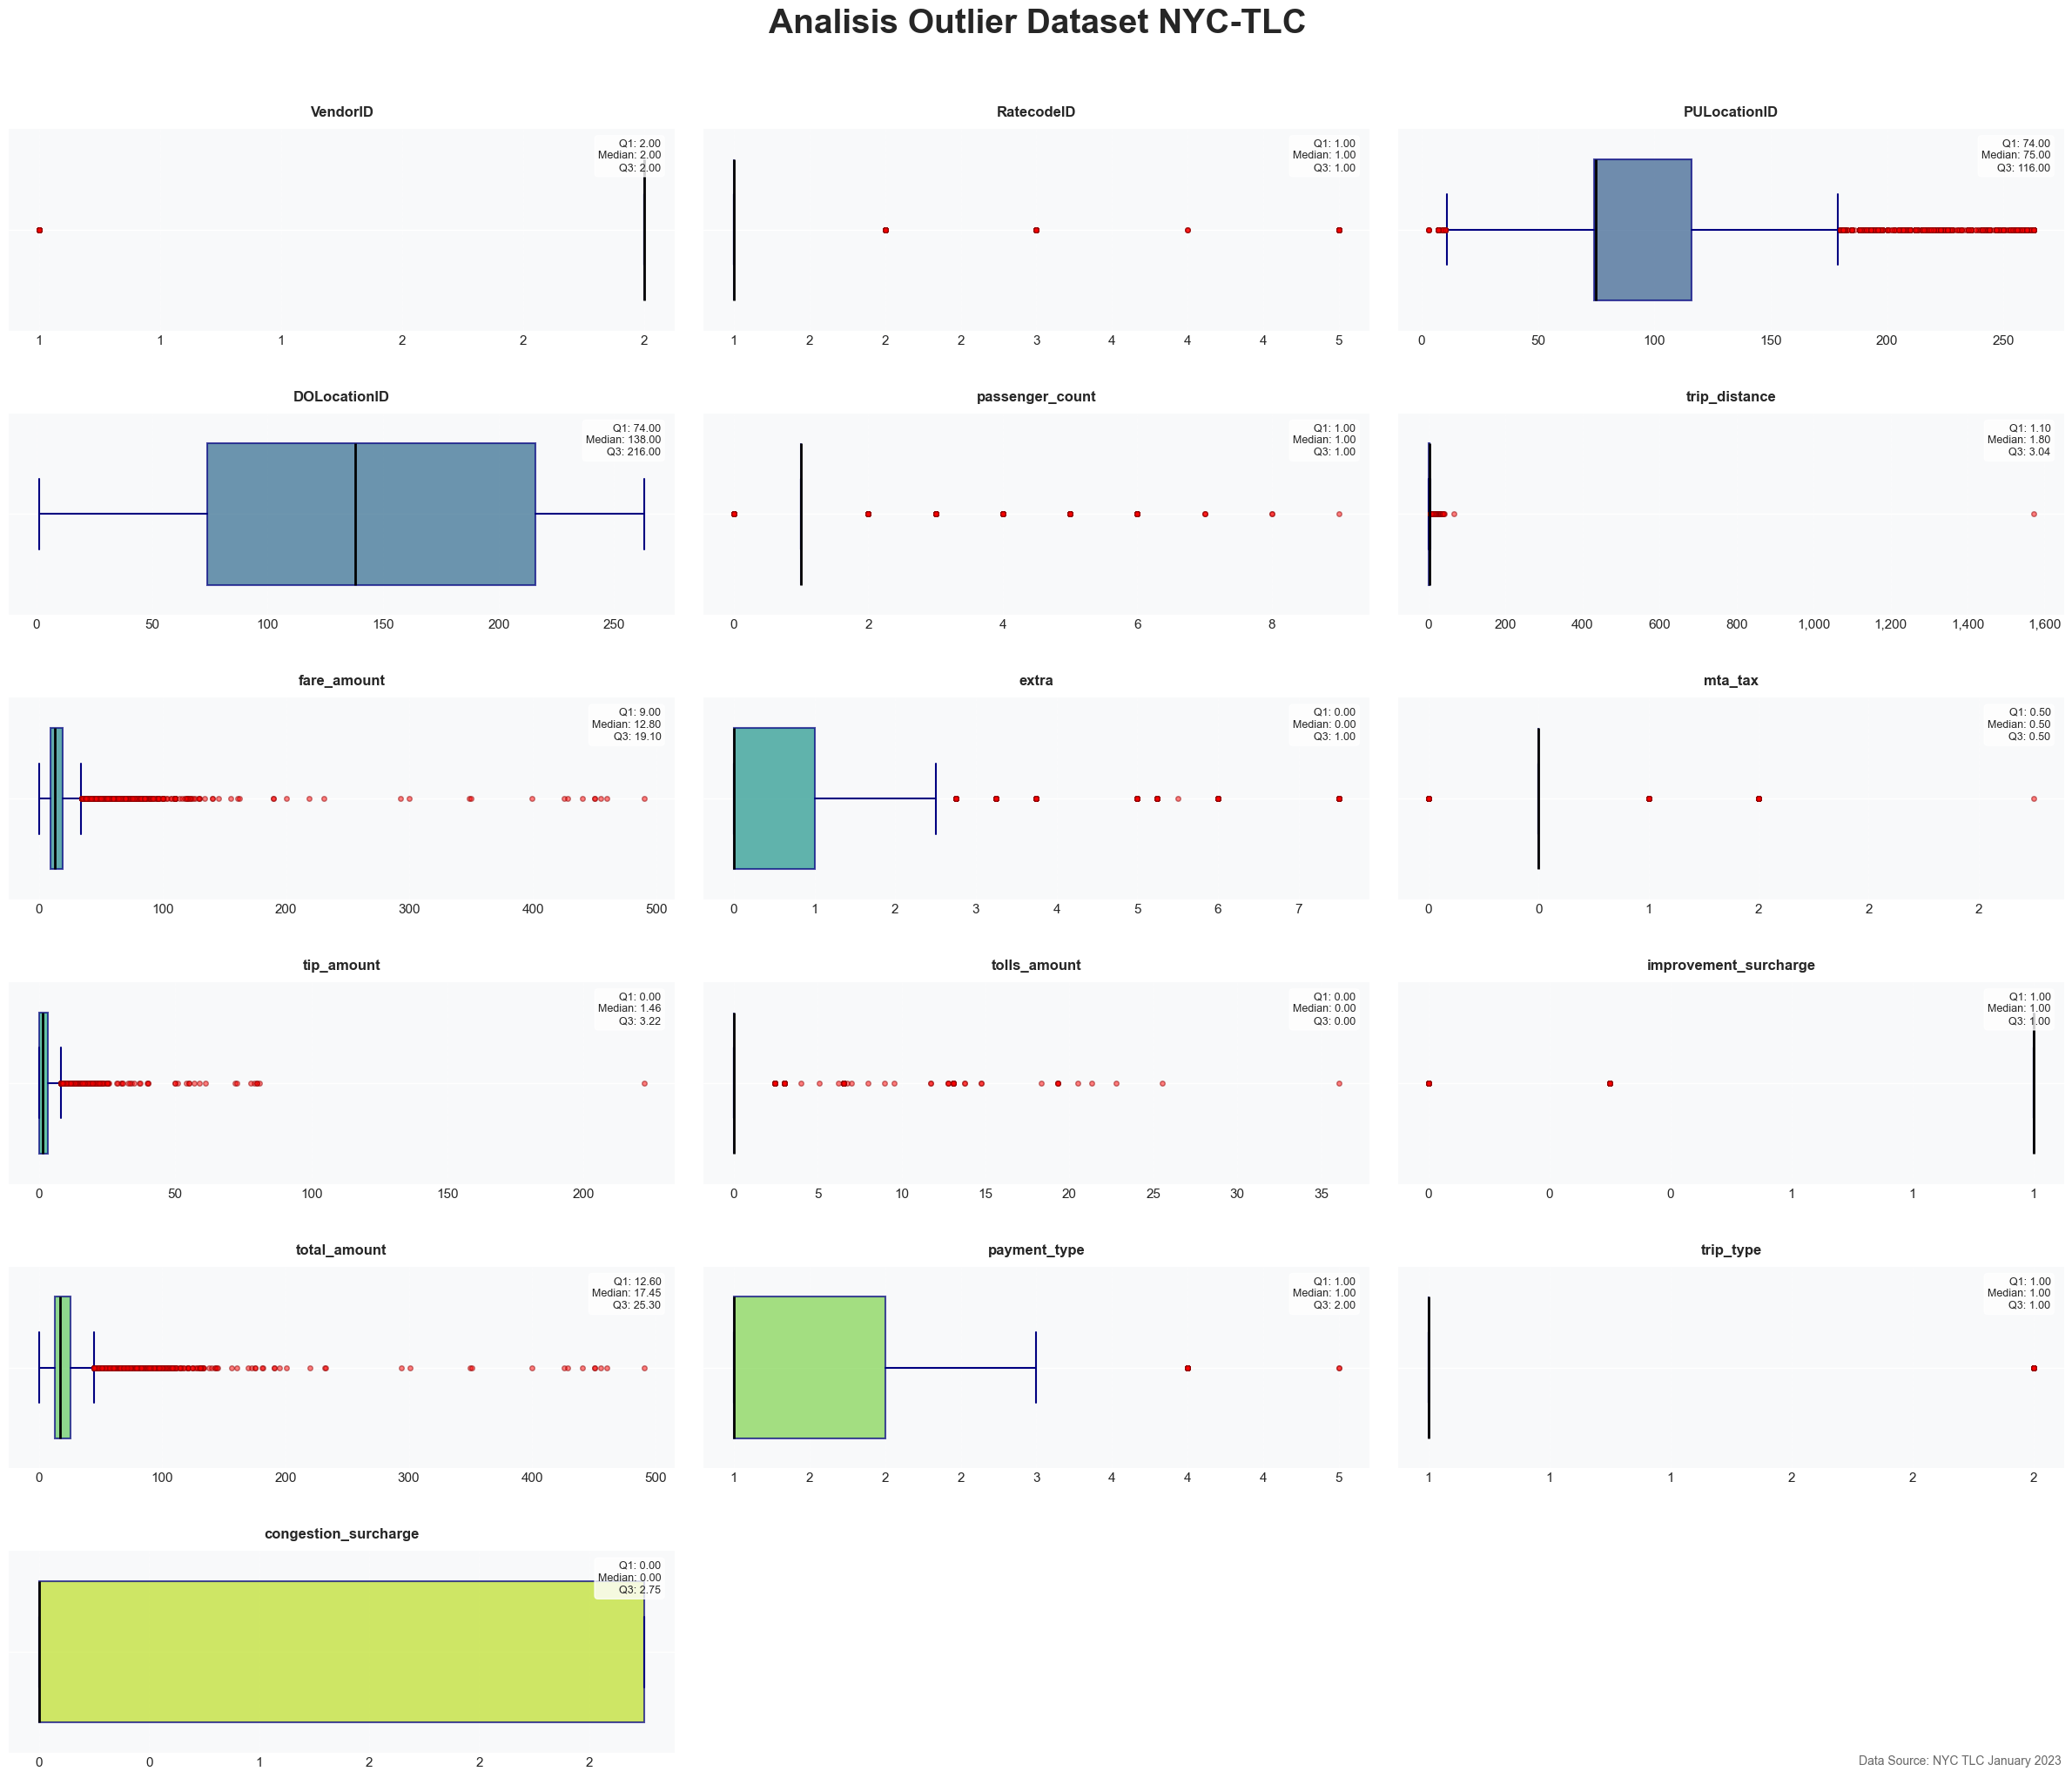

In [1208]:

# Set style untuk tampilan yang lebih menarik
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Membuat figure dan subplots
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(24, 20))
fig.suptitle('Analisis Outlier Dataset NYC-TLC', 
             fontsize=28, fontweight='bold', y=1.02)

# Flatten axes untuk iterasi yang lebih mudah
axs = axs.flatten()

# Warna gradasi untuk setiap boxplot
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(df.select_dtypes(include=[np.number]).columns)))

# Membuat boxplot untuk setiap kolom numerik
for index, (k, v) in enumerate(df.select_dtypes(include=[np.number]).items()):
    # Boxplot horizontal dengan styling
    box = axs[index].boxplot(df[k].dropna(), 
                             vert=False,  # Horizontal boxplot
                             patch_artist=True,
                             widths=0.7,
                             showfliers=True,
                             flierprops=dict(marker='o', 
                                           markerfacecolor='red', 
                                           markersize=4,
                                           alpha=0.5,
                                           markeredgecolor='darkred'),
                             medianprops=dict(linewidth=2, color='black'),
                             boxprops=dict(facecolor=colors[index], 
                                         alpha=0.7,
                                         edgecolor='navy',
                                         linewidth=1.5),
                             whiskerprops=dict(linewidth=1.5, color='navy'),
                             capprops=dict(linewidth=1.5, color='navy'))
    
    # Menambahkan judul untuk setiap subplot
    axs[index].set_title(k, fontsize=12, fontweight='bold', pad=10)
    
    # Menambahkan grid untuk memudahkan pembacaan
    axs[index].grid(True, axis='x', alpha=0.3, linestyle='--')
    axs[index].set_facecolor('#f8f9fa')
    
    # Menambahkan label nilai statistik
    quartiles = df[k].dropna().quantile([0.25, 0.5, 0.75])
    stats_text = f'Q1: {quartiles[0.25]:.2f}\nMedian: {quartiles[0.5]:.2f}\nQ3: {quartiles[0.75]:.2f}'
    
    # Posisikan text di pojok kanan atas
    axs[index].text(0.98, 0.95, stats_text,
                   transform=axs[index].transAxes,
                   fontsize=9,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Format x-axis untuk readability yang lebih baik
    axs[index].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    # Menghilangkan y-axis label karena tidak diperlukan untuk boxplot tunggal
    axs[index].set_yticklabels([])

# Menyembunyikan subplot yang tidak terpakai
for j in range(index + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout(w_pad=2, h_pad=3)

# Menambahkan watermark atau catatan
fig.text(0.99, 0.01, 'Data Source: NYC TLC January 2023', 
         ha='right', va='bottom', fontsize=10, alpha=0.7)

plt.show()

Hampir setiap boxplot data diatas menunjukkan tidak berdistribusi normal, cenderung skewness kanan

**Cek korelasi antar kolom**

In [1209]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'DO_Borough',
       'DO_Zone', 'DO_service_zone', 'PU_Borough', 'PU_Zone',
       'PU_service_zone'],
      dtype='object')

In [1210]:
korelasi = df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge']].corr()

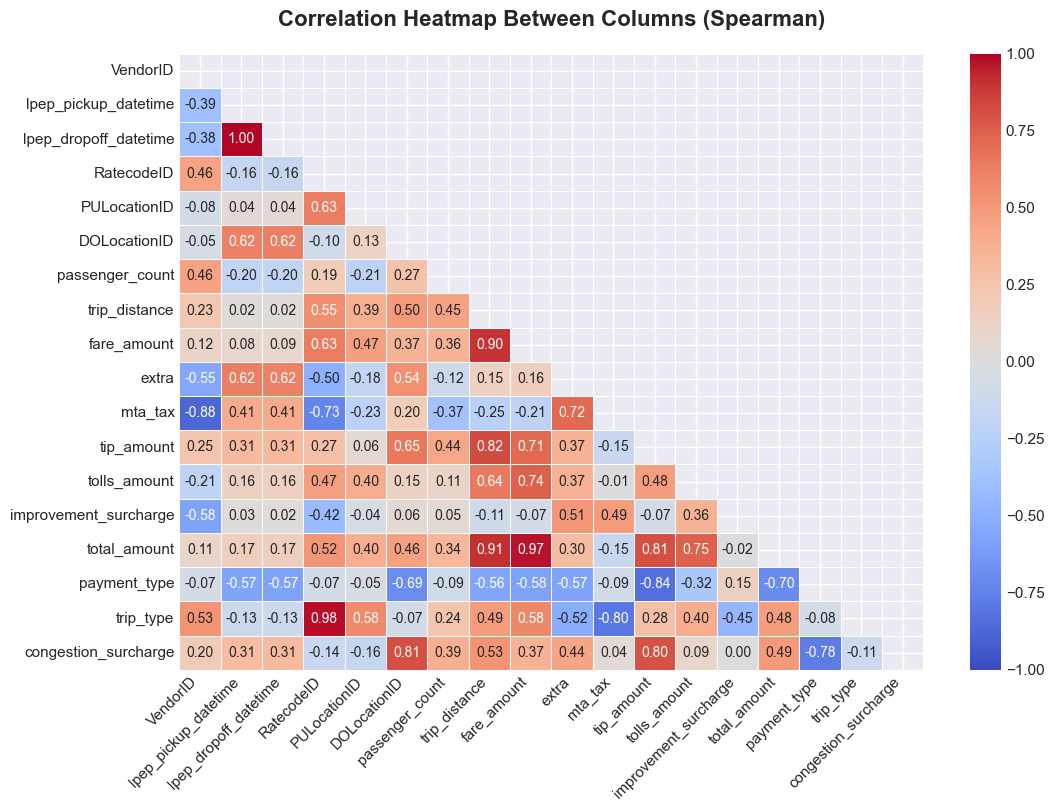

In [1211]:
# plot berbentuk heatmap

# 1. Hitung matriks korelasi terlebih dahulu agar kode lebih bersih
corr_matrix = korelasi.corr(method="spearman")

# 2. Buat mask untuk menyembunyikan bagian segitiga atas (opsional tapi bagus)
mask_for_corr = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Setting ukuran figure (diperbesar sedikit agar angka tidak bertumpuk)
plt.figure(figsize=(12, 8))

# 4. Gambar Heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,          # MENAMPILKAN ANGKA KORELASI
    fmt=".2f",           # FORMAT 2 ANGKA DI BELAKANG KOMA
    mask=mask_for_corr, 
    vmin=-1, vmax=1, 
    center=0, 
    cmap='coolwarm', 
    linewidths=.5,       # MEMBERI GARIS PEMISAH ANTAR KOTAK
    annot_kws={"size": 10} # MENGATUR UKURAN FONT ANGKA
)

plt.title("Correlation Heatmap Between Columns (Spearman)", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right') # Rotasi label X agar lebih rapi
plt.show()

Korelasi satu kolom dengan kolom yang lain:

- korelasi `lpep_pickup_datetime`dengan `lpep_dropoff_datetime` sebesar **1** , hubungannya sangat kuat secara positif karena saling berkaitan antara tempat penjemputan dan pengantaran
- korelasi `fare_amount` dengan `total_amount` sebesar **0.97**, hubungannya cukup kuat secara positif karena `total_amount` adalah total biaya yang dibayarkan penumpang termasuk `fare_amount` (jumlah tarif) yang didapat
- korelasi `trip_type` dengan `RatecodeID` sebesar **0.98**, hubungannya cukup kuat secara positif
- korelasi `trip_distance` dengan `total_amount` sebesar **0.91**, hubungannya cukup kuat secara positif bisa jadi karena total biaya yang dibayarkan penumpang bergantung dengan `trip_distance` (jarak yang ditempuh)
- korelasi `fare_amount` dengan `trip_distance`sebesar **0.90**, hubungannya cukup kuat secara positif bisa jadi karena `fare_amount` (jumlah tarif) yang didapat penumpang bergantung dengan `trip_distance` (jarak yang ditempuh)
- korelasi `tip_amount` dengan `trip_distance`sebesar **0.82**, hubungannya cukup kuat secara positif
- korelasi `congestion_surcharge` dengan `DOLocationID` sebesar **0.81**, hubungannya cukup kuat secara positif
- korelasi `tip_amount` dengan `total_amount`sebesar **0.81**, hubungannya cukup kuat secara positif
- korelasi `tip_amount` dengan `congestion_surcharge`sebesar **0.80**, hubungannya cukup kuat secara positif

- **Mengganti nilai dataframe ke data string sesuai keterangan**

In [1212]:
# kolom VendorID
df['VendorID'].replace([1, 2],['Creative Mobile Technologies, LLC', 'VeriFone Inc'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\1186379579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VendorID'].replace([1, 2],['Creative Mobile Technologies, LLC', 'VeriFone Inc'], inplace=True)


In [1213]:
# kolom `RatecodeID`
df['RatecodeID'].replace([1, 2, 3, 4, 5, 6],['Standard rate', 'JFK', 'Newark', 'Nassau or Westchester', 'Negotiated fare', 'Group ride'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\3878098412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].replace([1, 2, 3, 4, 5, 6],['Standard rate', 'JFK', 'Newark', 'Nassau or Westchester', 'Negotiated fare', 'Group ride'], inplace=True)


In [1214]:
# kolom `payment_type`
df['payment_type'].replace([1, 2, 3, 4, 5, 6],['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\629409971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1, 2, 3, 4, 5, 6],['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'], inplace=True)


In [1215]:
# kolom `trip_type`
df['trip_type'].replace([1, 2],['Street-hail', 'Dispatch'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\3684183604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].replace([1, 2],['Street-hail', 'Dispatch'], inplace=True)


## **5. Data Analysis**

Kita sudah melakukan tahap data cleaning. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **---**.  

Analisis akan dilakukan dengan membandingkan data

### **a. Berdasarkan Korelasi**

- **Tarif pajak by vendor taksi**

In [1216]:

pd.pivot_table(df, values='lpep_pickup_datetime', index=['VendorID', 'mta_tax'], aggfunc="count")

lpep_pickup_datetime
VendorID                          mta_tax                      
Creative Mobile Technologies, LLC 0.00     62                  
                                  0.50     45                  
                                  1.00     25                  
                                  1.50     8934                
                                  2.75     1                   
VeriFone Inc                      0.00     1243                
                                  0.50     52865

- **jumlah transaksi tiap RatecodeID by type trip**

In [1217]:

pd.pivot_table(data = df, values='lpep_pickup_datetime', index=['trip_type', 'RatecodeID'], aggfunc="count")

lpep_pickup_datetime
trip_type   RatecodeID                                 
Dispatch    Negotiated fare        1140                
            Standard rate          6                   
Street-hail JFK                    155                 
            Nassau or Westchester  3                   
            Negotiated fare        131                 
            Newark                 24                  
            Standard rate          61716

Dapat dilihat penumpang yang memesan taksi dengan cara Street-hail atau dipanggil dijalan biasanya menggunakan tarif standar, sedangkan penumpang yang memesan via Dispatch atau palikasi biasanya menggunkan tarif negosiasi

- **Jumlah keseluruhan tip yang didapat by type pembayaran**

In [1218]:

pd.pivot_table(df, values='tip_amount', index=['payment_type'], aggfunc="sum").sort_values(by=['tip_amount'],ascending=False)

,tip_amount
payment_type,
Credit card,128559.33
Dispute,21.00
No charge,9.30
Cash,5.00
Unknown,0.00


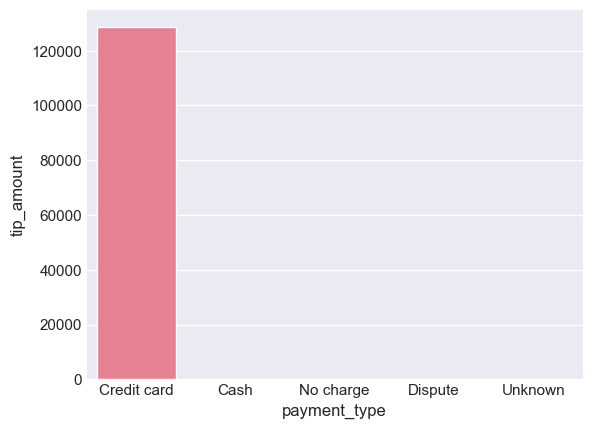

In [1219]:
sns.barplot(data =df,
            x= "payment_type",
            y = "tip_amount",
            hue= "payment_type",
            estimator= "sum",
            errorbar= None)

plt.show()

- **Banyaknya tip yang didapat by type pembayaran**

In [1220]:

pd.pivot_table(df, values='tip_amount', index=['payment_type'], aggfunc="count").sort_values(by=['tip_amount'],ascending=False)

,tip_amount
payment_type,
Credit card,40247
Cash,22374
No charge,460
Dispute,92
Unknown,2


Data diatas menunjukkan banyaknya tip yang didapat berdasarkan type pembayaran adalah kartu kredit, untuk kesejahteraan supir bisa diadakan promosi yang menarik bagi pengguna kartu kredit agar mayoritas penumpang menggunakan kartu kredit.

### **b. Berdasarkan data perjalanan**

- **Daerah macet**

In [1221]:
# Daerah macet adalah daerah yang memiliki biaya tambahan congestion_surcharge == 2.75

zona_macet = pd.pivot_table(df, values='lpep_pickup_datetime', index=['congestion_surcharge', 'DO_Zone'], aggfunc="count")
zona_macet

lpep_pickup_datetime
congestion_surcharge DO_Zone                                        
0.00                 Allerton/Pelham Gardens    11                  
                     Alphabet City              2                   
                     Astoria                    1102                
                     Astoria Park               3                   
                     Auburndale                 26                  
...                                            ..                   
2.75                 Williamsburg (South Side)  8                   
                     Woodside                   2                   
                     World Trade Center         34                  
                     Yorkville East             848                 
                     Yorkville West             1410                

[364 rows x 1 columns]

In [1222]:
# Top 10 daerah termacet berdasarkan jumlah transaksi
macet = zona_macet.loc[2.75].reset_index().sort_values(by=['lpep_pickup_datetime'], ascending=False).head(10)
macet

,DO_Zone,lpep_pickup_datetime
112,Upper East Side North,2491
114,Upper West Side North,1416
127,Yorkville West,1410
115,Upper West Side South,1397
113,Upper East Side South,980
126,Yorkville East,848
64,Lincoln Square East,743
63,Lenox Hill West,706
62,Lenox Hill East,701
20,Central Park,546


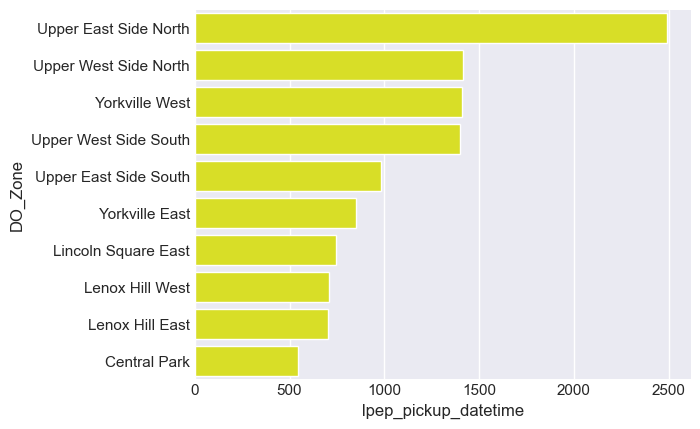

In [ ]:

sns.barplot(data = macet,
            x= "lpep_pickup_datetime",
            y = "DO_Zone",
            errorbar= None,
            color= "#F5FD08DD" )
plt.show()

Data diatas adalah 10 daerah drop off yang sering macet, sehingga penumpang diharuskan membayar lebih sebesar $2.75

**Dataset baru df_kordinat**

In [1224]:
# pip install geopandas

Sedang mendownload dan membaca data peta...
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0  1         0.116357    0.000782    Newark Airport           1            
1  2         0.433470    0.004866    Jamaica Bay              2            
2  3         0.084341    0.000314    Allerton/Pelham Gardens  3            
3  4         0.043567    0.000112    Alphabet City            4            
4  5         0.092146    0.000498    Arden Heights            5            

         borough  \
0  EWR             
1  Queens          
2  Bronx           
3  Manhattan       
4  Staten Island   

                                                                                                                                                                                                                                                                                                                                                                                          

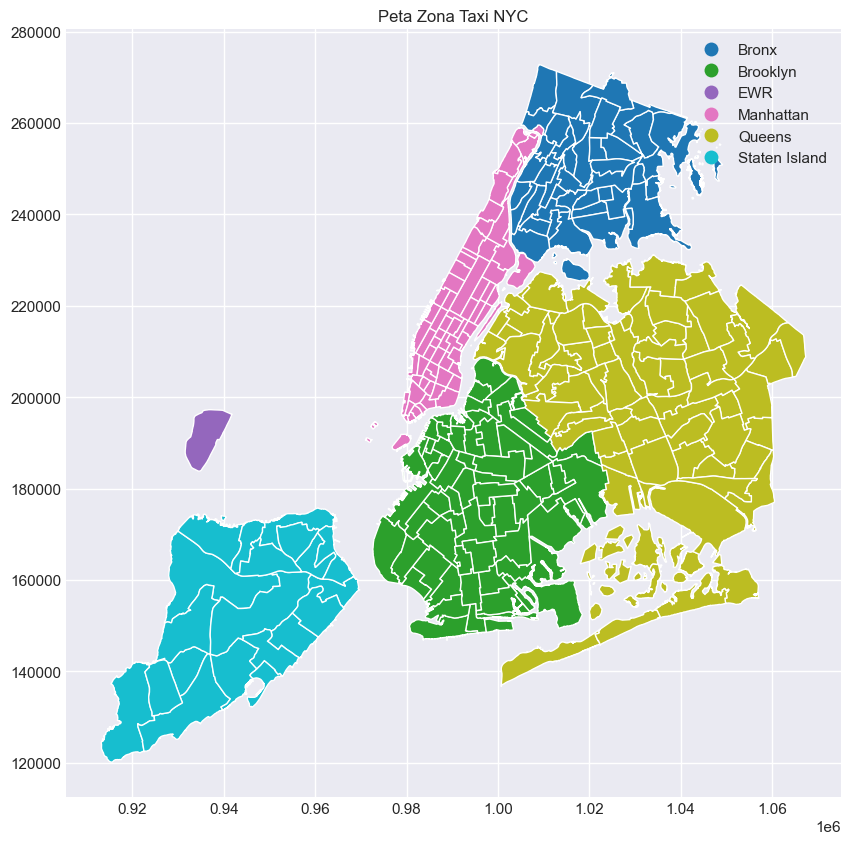

In [1225]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load Shapefile Zona Taxi NYC (Format GeoJSON atau Shapefile)
# Ini adalah file resmi yang memuat bentuk peta setiap LocationID
url_shapefile = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip"

print("Sedang mendownload dan membaca data peta...")
gdf_zones = gpd.read_file(url_shapefile)

# Lihat isi datanya
# Kolom 'geometry' berisi bentuk poligon daerah tersebut
print(gdf_zones.head())

# 2. Mengubah Poligon menjadi Titik Koordinat (Centroid)
# Kita cari titik tengah dari setiap wilayah agar dapat Latitude & Longitude
gdf_zones['centroid'] = gdf_zones.geometry.centroid
gdf_zones['longitude'] = gdf_zones['centroid'].x
gdf_zones['latitude'] = gdf_zones['centroid'].y

# 3. Merapikan DataFrame
# Kita hanya butuh ID, Nama Zona, dan Koordinatnya
df_koordinat = gdf_zones[['LocationID', 'zone', 'borough', 'latitude', 'longitude']].copy()

print("\nData Koordinat Berhasil Dibuat:")
print(df_koordinat.head())

# (Opsional) Visualisasi Peta untuk memastikan data benar
gdf_zones.plot(column='borough', legend=True, figsize=(10, 10))
plt.title("Peta Zona Taxi NYC")
plt.show()

In [1226]:
df_koordinat.head()

,LocationID,zone,borough,latitude,longitude
0,1,Newark Airport,EWR,191376.749531,9.359968e+05
1,2,Jamaica Bay,Queens,164018.754403,1.031086e+06
2,3,Allerton/Pelham Gardens,Bronx,254265.478659,1.026453e+06
3,4,Alphabet City,Manhattan,202959.782391,9.906340e+05
4,5,Arden Heights,Staten Island,140681.351376,9.318714e+05


In [1227]:
# Daerah dengan waktu tersibuk
# Daerah tersibuk adalah daerah yang memiliki tarif dasar == 0.50

zona_sibuk = pd.pivot_table(df, values='lpep_pickup_datetime', index=['fare_amount', 'DO_Zone'], aggfunc="count")
zona_sibuk

lpep_pickup_datetime
fare_amount DO_Zone                                      
0.0         Astoria                  5                   
            Baisley Park             3                   
            Bloomfield/Emerson Hill  2                   
            Central Park             1                   
            College Point            1                   
...                                 ..                   
450.0       Flushing                 1                   
            Queens Village           1                   
455.0       Flushing                 1                   
459.9       Jamaica                  1                   
490.0       Jamaica                  1                   

[10002 rows x 1 columns]

- **Jumlah perjalanan perhari**

In [1228]:
# Kita buat kolom 'date' dan 'hour' untuk keperluan merging nanti
df['date'] = df['lpep_pickup_datetime'].dt.date
df['hour'] = df['lpep_pickup_datetime'].dt.hour

In [1229]:
df["date"].head()

0    2023-01-01
1    2023-01-01
2    2023-01-01
3    2023-01-01
4    2023-01-01
Name: date, dtype: object

In [1316]:
count_date = df.groupby(df["date"]).size().reset_index(name="Count")
count_date

,date,Count
0,2023-01-01,1266
1,2023-01-02,1442
2,2023-01-03,1963
3,2023-01-04,2236
4,2023-01-05,2220
5,2023-01-06,2365
6,2023-01-07,2003
7,2023-01-08,1553
8,2023-01-09,2083
9,2023-01-10,2024


C:\Users\HP\AppData\Local\Temp\ipykernel_27448\2409766815.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data= count_date,


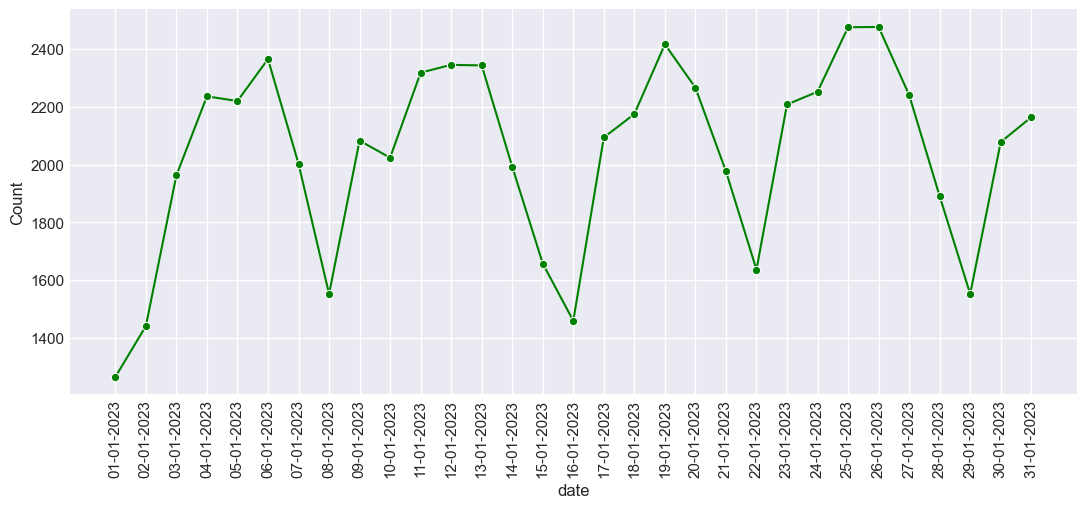

In [1290]:
plt.figure(figsize=(13, 5))
sns.lineplot(data= count_date,
             x= "date",
             y = "Count",
             errorbar= None,
             marker = "o",
             ci = 0,
             color= "green")

plt.xticks(ticks = count_date["date"],
           rotation = 90,
           labels= [dt.strftime('%d-%m-%Y') for dt in count_date['date']] )
plt.show()

Terdapat tren yang cukup jelas dalam pemesanan taksi, pemesanan taksi akan naik di hari kerja dan turun pada hari libur.

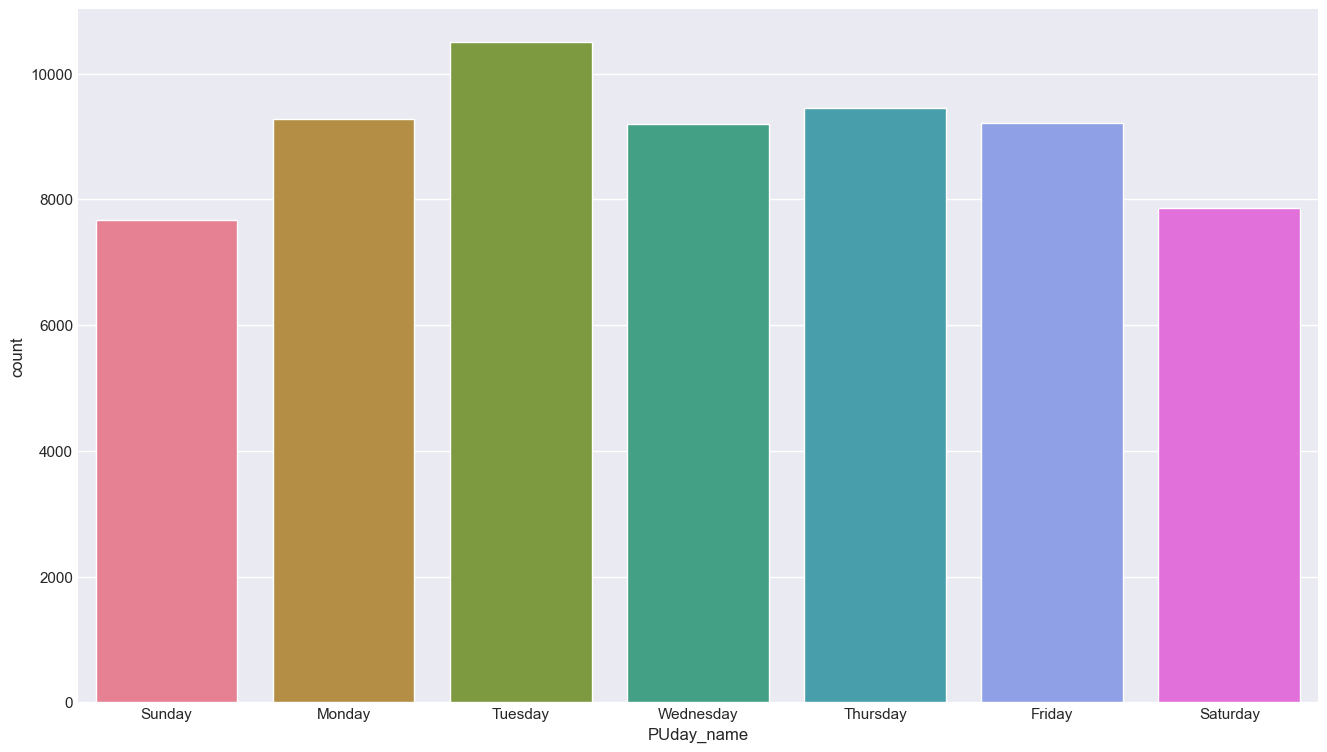

In [1232]:
# Jumlah perjalanan perhari

df["PUday_name"] = df['lpep_pickup_datetime'].dt.day_name()

plt.figure(figsize=(16,9))
sns.countplot(data= df, x= "PUday_name", hue= "PUday_name")
plt.show()

Jumlah pemesanan taxi paling banyak ada pada hari selasa bukan di hari minggu

- **Jumlah perjalanan perjam**

In [1233]:
df["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [1318]:
count_hour = df.groupby(df["hour"]).size().reset_index(name="Count")
count_hour

,hour,Count
0,0,1021
1,1,791
2,2,568
3,3,528
4,4,389
5,5,375
6,6,876
7,7,2379
8,8,2870
9,9,3162


C:\Users\HP\AppData\Local\Temp\ipykernel_27448\3801437325.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data= count_hour,


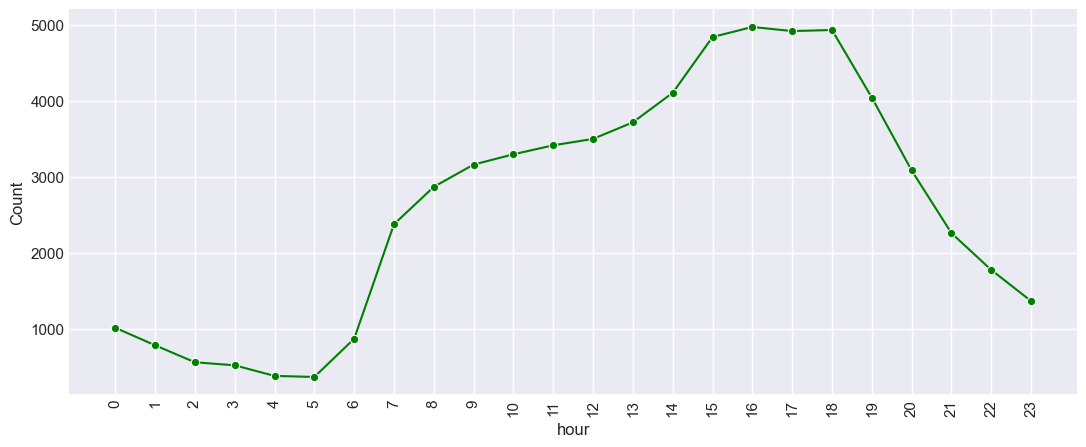

In [1235]:
plt.figure(figsize=(13, 5))
sns.lineplot(data= count_hour,
             x= "hour",
             y = "Count",
             errorbar= None,
             marker = "o",
             ci = 0,
             color = "green")

plt.xticks(ticks = count_hour["hour"],
           rotation = 90)
plt.show()

Jam 16.00 Adalah jam sibuk untuk pemesanan taksi 

- **Jumlah penumpang perhari**

In [1317]:
count_passenger = df.groupby(df["date"])[["passenger_count"]].sum().reset_index()
count_passenger

,date,passenger_count
0,2023-01-01,1769.0
1,2023-01-02,1895.0
2,2023-01-03,2701.0
3,2023-01-04,2838.0
4,2023-01-05,3019.0
5,2023-01-06,3237.0
6,2023-01-07,2573.0
7,2023-01-08,2073.0
8,2023-01-09,2753.0
9,2023-01-10,2580.0


C:\Users\HP\AppData\Local\Temp\ipykernel_27448\2011701612.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data= count_passenger,


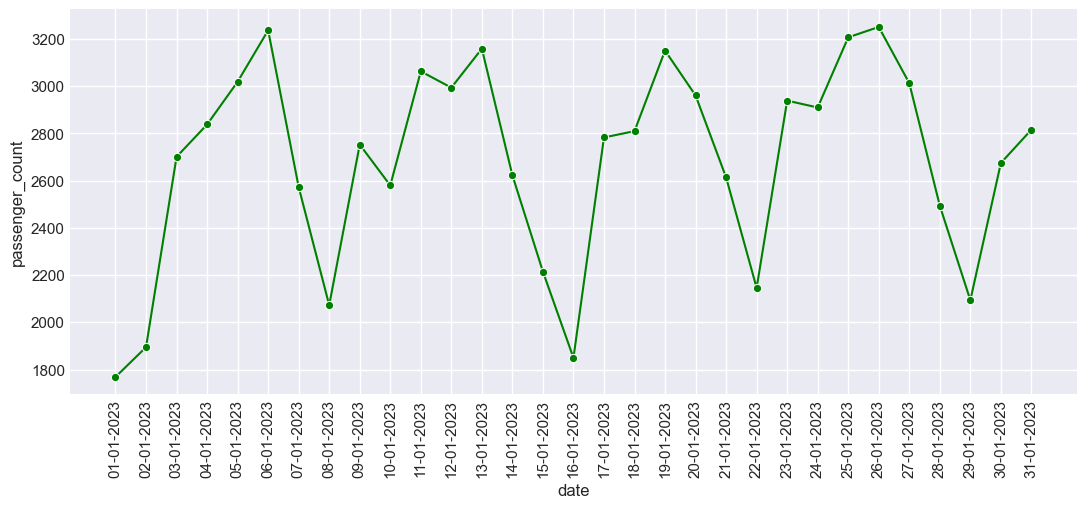

In [1237]:
plt.figure(figsize=(13, 5))
sns.lineplot(data= count_passenger,
             x= "date",
             y = "passenger_count",
             errorbar= None,
             marker = "o",
             ci = 0,
             color = "green")

plt.xticks(ticks = count_passenger["date"],
           rotation = 90,
           labels= [dt.strftime('%d-%m-%Y') for dt in count_passenger['date']] )
plt.show()

Terdapat pola yang sama dengan total perjalanan perhari, jumlah penumpang perhari mengalami kenaikan pada hari kerja dan mengalami penurunan pada hari libur.

- **Jumlah perjalanan by PUlocation**

In [1238]:
top10_PUzone = df["PU_Zone"].value_counts().reset_index().sort_values(by= "count", ascending= False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\1509856722.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


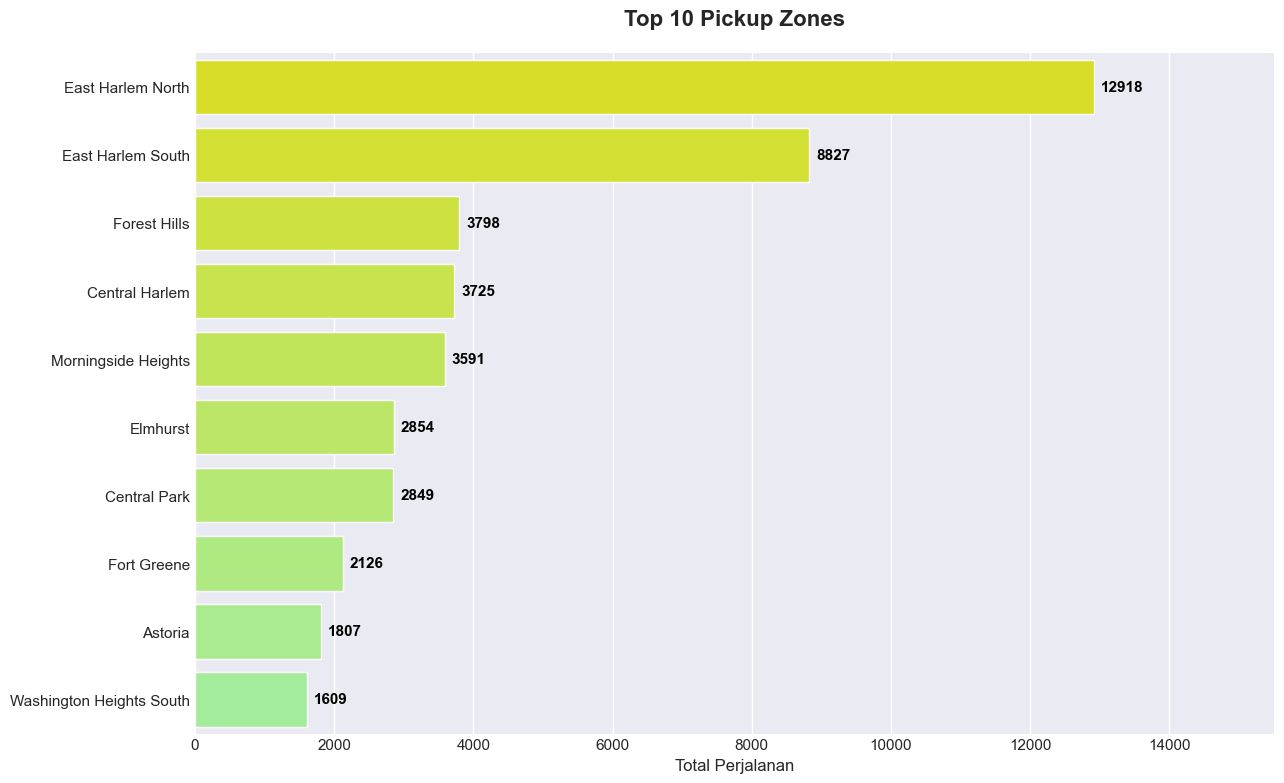

In [1239]:

# 1. Menyiapkan Warna Baby Pink Gradasi
# Kita buat gradasi dari Baby Pink (#FFB6C1) ke Deep Pink/Ungu (#C71585)
# as_cmap=False agar jadi list warna, n_colors=10 sesuai jumlah data
colors = sns.blend_palette(["#98FA8D", "#F5FD08DD"], n_colors=10)

# Jika ingin yang Paling Atas (Terbanyak) berwarna Gelap, dan Bawah Baby Pink:
colors = colors[::-1] 
# (Hapus baris "colors = colors[::-1]" jika ingin yang paling atas justru Baby Pink muda)

# 2. Setup Canvas
plt.figure(figsize=(13, 8))

# 3. Plotting
ax = sns.barplot(
    x='count', 
    y='PU_Zone', 
    data=top10_PUzone, 
    palette=colors
)

# 4. CARA MANUAL (ANTI GAGAL) UNTUK MENAMPILKAN LABEL
# Kita iterasi setiap 'patch' (batang) yang ada di gambar
for p in ax.patches:
    # Ambil lebar batang (ini adalah nilai jumlah transaksinya)
    width = p.get_width()
    
    # Ambil posisi Y (tinggi batang) untuk menaruh teks di tengah-tengah batang
    y_position = p.get_y() + p.get_height() / 2
    
    # Tulis Teksnya
    # xy=(width, y_position) -> Posisi teks
    # xytext=(5, 0) -> Geser sedikit 5 pixel ke kanan agar tidak nempel batang
    if width > 0: # Hanya tulis jika nilainya ada
        ax.annotate(f'{int(width)}', 
                    xy=(width, y_position), 
                    xytext=(5, 0),
                    textcoords="offset points",
                    ha='left', va='center', 
                    fontsize=11, fontweight='bold', color='black')

# 5. Memperlebar Batas Kanan
# Ini WAJIB agar angka tidak terpotong garis pinggir gambar
max_val = top10_PUzone['count'].max()
plt.xlim(0, max_val * 1.2) 

# 6. Estetika Akhir
plt.title('Top 10 Pickup Zones', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Perjalanan', fontsize=12)
plt.ylabel('') # Kosongkan label Y karena nama daerah sudah jelas
sns.despine(left=True, bottom=False) # Hapus garis kotak

plt.tight_layout()
plt.show()

In [1240]:
top10_PUborough = df["PU_Borough"].value_counts().reset_index().sort_values(by= "count", ascending= False)

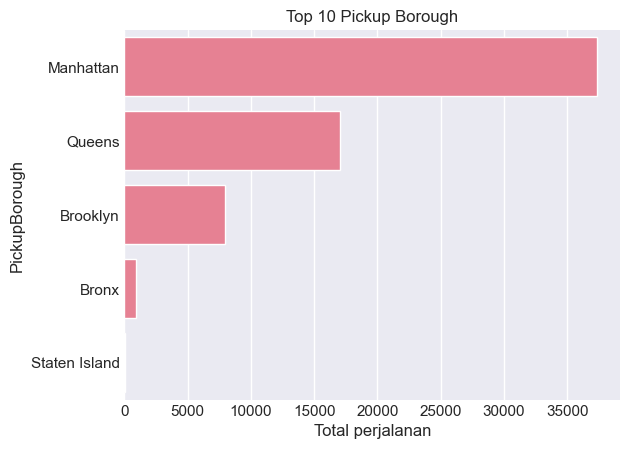

In [1241]:
sns.barplot(x='count', y='PU_Borough', data=top10_PUborough, errorbar=None )

plt.title('Top 10 Pickup Borough')
plt.xlabel('Total perjalanan')
plt.ylabel('PickupBorough')
plt.show()

- **Jumlah perjalanan by DOlocation**

In [1242]:
top10_DOzone = df["DO_Zone"].value_counts().reset_index().sort_values(by= "count", ascending= False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\3154289206.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


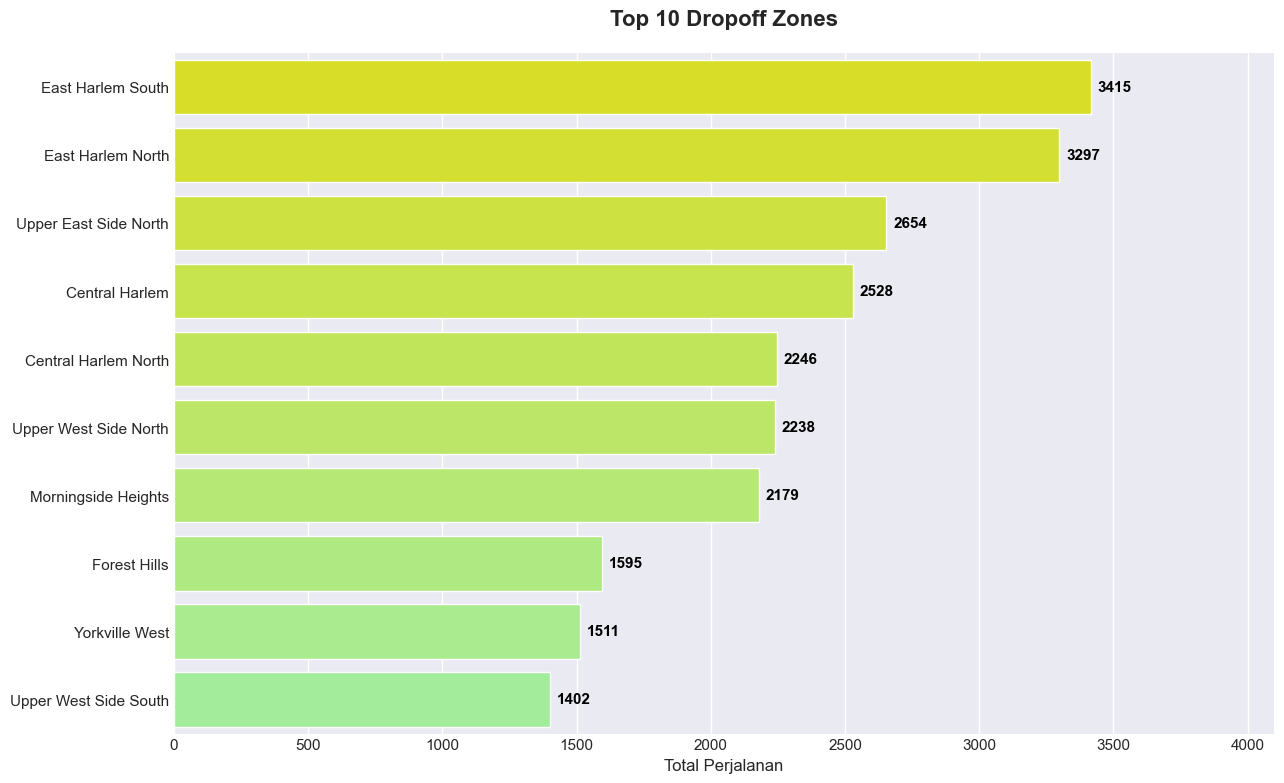

In [ ]:
# 1. Menyiapkan Warna Baby Pink Gradasi
# Kita buat gradasi dari Baby Pink (#FFB6C1) ke Deep Pink/Ungu (#C71585)
# as_cmap=False agar jadi list warna, n_colors=10 sesuai jumlah data



# Jika ingin yang Paling Atas (Terbanyak) berwarna Gelap, dan Bawah Baby Pink:
colors = colors[::-1] 
# (Hapus baris "colors = colors[::-1]" jika ingin yang paling atas justru Baby Pink muda)

# 2. Setup Canvas
plt.figure(figsize=(13, 8))

# 3. Plotting
ax = sns.barplot(
    x='count', 
    y='DO_Zone', 
    data= top10_DOzone, 
    palette=colors
)

# 4. CARA MANUAL (ANTI GAGAL) UNTUK MENAMPILKAN LABEL
# Kita iterasi setiap 'patch' (batang) yang ada di gambar
for p in ax.patches:
    # Ambil lebar batang (ini adalah nilai jumlah transaksinya)
    width = p.get_width()
    
    # Ambil posisi Y (tinggi batang) untuk menaruh teks di tengah-tengah batang
    y_position = p.get_y() + p.get_height() / 2
    
    # Tulis Teksnya
    # xy=(width, y_position) -> Posisi teks
    # xytext=(5, 0) -> Geser sedikit 5 pixel ke kanan agar tidak nempel batang
    if width > 0: # Hanya tulis jika nilainya ada
        ax.annotate(f'{int(width)}', 
                    xy=(width, y_position), 
                    xytext=(5, 0),
                    textcoords="offset points",
                    ha='left', va='center', 
                    fontsize=11, fontweight='bold', color='black')

# 5. Memperlebar Batas Kanan
# Ini WAJIB agar angka tidak terpotong garis pinggir gambar
max_val = top10_DOzone['count'].max()
plt.xlim(0, max_val * 1.2) 

# 6. Estetika Akhir
plt.title('Top 10 Dropoff Zones', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Perjalanan', fontsize=12)
plt.ylabel('') # Kosongkan label Y karena nama daerah sudah jelas
sns.despine(left=True, bottom=False) # Hapus garis kotak

plt.tight_layout()
plt.show()

In [1244]:
top10_DOborough = df["DO_Borough"].value_counts().reset_index().sort_values(by= "count", ascending= False)

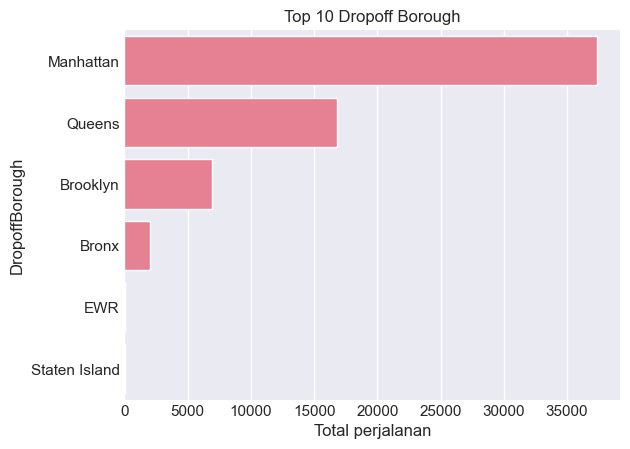

In [1245]:
sns.barplot(x='count', y='DO_Borough', data=top10_DOborough, errorbar=None )

plt.title('Top 10 Dropoff Borough')
plt.xlabel('Total perjalanan')
plt.ylabel('DropoffBorough')
plt.show()

### **c. Berdasarkan pendapatan**

**Analisis**

1. Pendapaan dan transaksi terbanyak berdasarkan `RatecodeID`
2. Pendapaan dan transaksi terbanyak berdasarkan `trip_type`
3. Pendapaan dan transaksi terbanyak berdasarkan `payment_type`
4. Pendapaan dan transaksi terbanyak berdasarkan `PU_Zone`
5. Pendapaan dan transaksi terbanyak berdasarkan `DO_Zone`
6. Pendapatan perhari & perminggu --> hari yang paling banyak ada di PU_Zone dan DO_Zone mana


- **Pendapaan dan transaksi terbanyak berdasarkan `RatecodeID`**

In [1246]:
Total = df.groupby("RatecodeID")[["total_amount"]].sum().sort_values(by="total_amount", ascending= False).reset_index()
Total

,RatecodeID,total_amount
0,Standard rate,1271163.38
1,Negotiated fare,43239.05
2,JFK,13154.20
3,Newark,1548.50
4,Nassau or Westchester,195.05


In [1247]:
Banyaknya = df.groupby("RatecodeID")[["total_amount"]].count().sort_values(by="total_amount", ascending= False).reset_index()
Banyaknya

,RatecodeID,total_amount
0,Standard rate,61722
1,Negotiated fare,1271
2,JFK,155
3,Newark,24
4,Nassau or Westchester,3


In [1248]:
amount_RatecodeID =  Total.merge(Banyaknya, left_on= "RatecodeID", right_on="RatecodeID", suffixes= ("_SUM", "_COUNT"))
amount_RatecodeID

,RatecodeID,total_amount_SUM,total_amount_COUNT
0,Standard rate,1271163.38,61722
1,Negotiated fare,43239.05,1271
2,JFK,13154.20,155
3,Newark,1548.50,24
4,Nassau or Westchester,195.05,3


In [1249]:
# Mengubah kategori 'JFK', 'Nassau or Westchester', 'Newark' menjadi 'Others'

amount_RatecodeID['RatecodeID'] = amount_RatecodeID['RatecodeID'].apply(lambda x: x if (x == 'Standard rate') or (x == 'Negotiated fare') else 'Other')
amount_RatecodeID = amount_RatecodeID.groupby('RatecodeID').agg(total_amount_SUM = ('total_amount_SUM', 'sum'), total_amount_COUNT = ('total_amount_COUNT', 'sum')).sort_values(by = 'total_amount_SUM', ascending = False).reset_index()
amount_RatecodeID

,RatecodeID,total_amount_SUM,total_amount_COUNT
0,Standard rate,1271163.38,61722
1,Negotiated fare,43239.05,1271
2,Other,14897.75,182


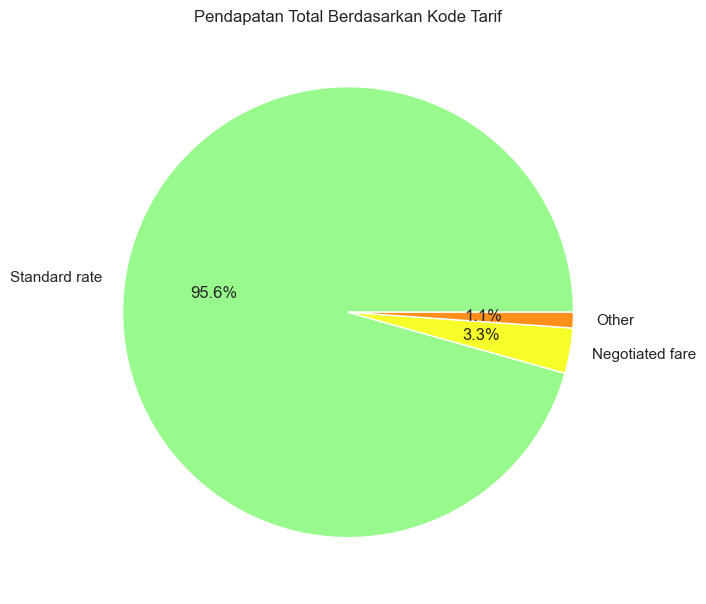

In [1292]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(
    x = amount_RatecodeID['total_amount_SUM'],
    labels= amount_RatecodeID['RatecodeID'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"]
)
plt.title('Pendapatan Total Berdasarkan Kode Tarif')
plt.show()

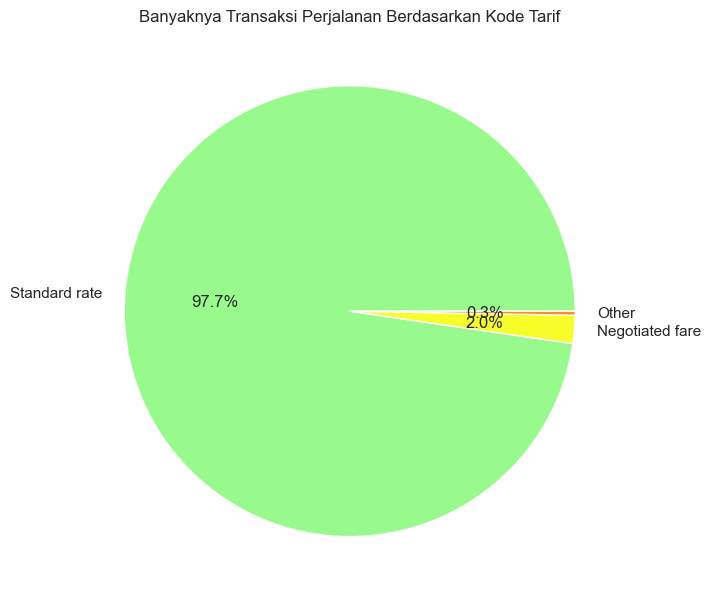

In [1295]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,2)
plt.pie(
    x = amount_RatecodeID['total_amount_COUNT'],
    labels= amount_RatecodeID['RatecodeID'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"])
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Kode Tarif')
plt.show()

- **Pendapaan dan transaksi terbanyak berdasarkan `trip_type`**

In [1252]:
Total = df.groupby("trip_type")[["total_amount"]].sum().sort_values(by="total_amount", ascending= False).reset_index()
Banyaknya = df.groupby("trip_type")[["total_amount"]].count().sort_values(by="total_amount", ascending= False).reset_index()
amount_trip_type =  Total.merge(Banyaknya, left_on= "trip_type", right_on="trip_type", suffixes= ("_SUM", "_COUNT"))
amount_trip_type

,trip_type,total_amount_SUM,total_amount_COUNT
0,Street-hail,1289237.90,62029
1,Dispatch,40062.28,1146


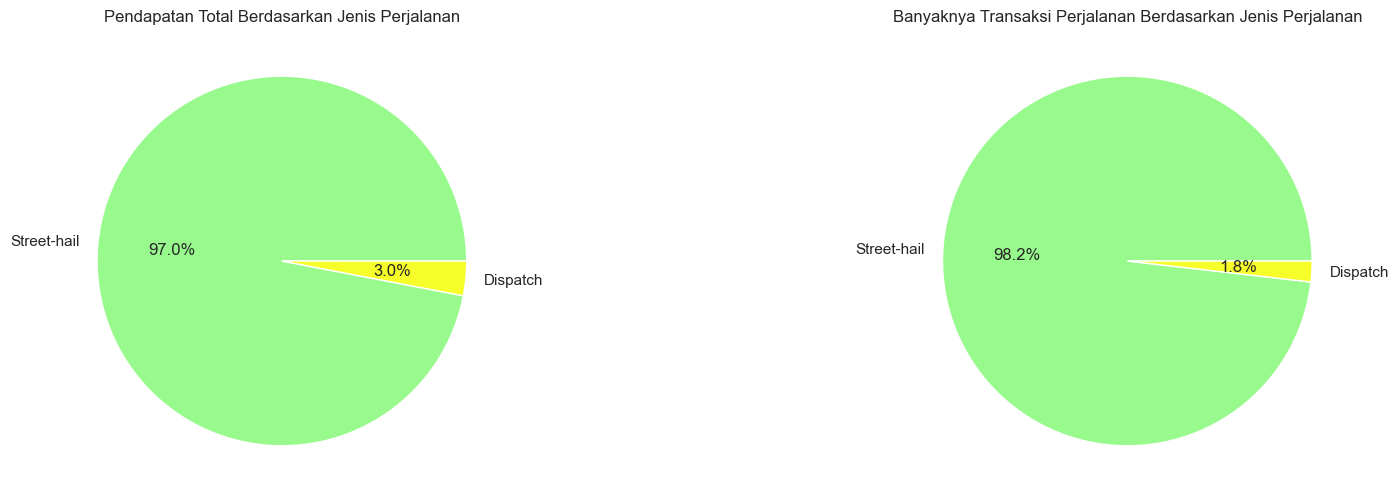

In [1296]:

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.pie(
    x = amount_trip_type['total_amount_SUM'],
    labels= amount_trip_type['trip_type'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"]
)
plt.title('Pendapatan Total Berdasarkan Jenis Perjalanan')

plt.subplot(1,2,2)
plt.pie(
    x = amount_trip_type['total_amount_COUNT'],
    labels= amount_trip_type['trip_type'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"]
)
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Jenis Perjalanan')

plt.show()

- **Pendapaan dan transaksi terbanyak berdasarkan `payment_type`**

In [1254]:
Total = df.groupby("payment_type")[["total_amount"]].sum().sort_values(by="total_amount", ascending= False).reset_index()
Banyaknya = df.groupby("payment_type")[["total_amount"]].count().sort_values(by="total_amount", ascending= False).reset_index()
amount_payment_type =  Total.merge(Banyaknya, left_on= "payment_type", right_on="payment_type", suffixes= ("_SUM", "_COUNT"))
amount_payment_type

,payment_type,total_amount_SUM,total_amount_COUNT
0,Credit card,918444.26,40247
1,Cash,405401.97,22374
2,No charge,4614.10,460
3,Dispute,810.35,92
4,Unknown,29.50,2


In [1255]:
# Mengubah kategori sisanya menjadi 'Others'

amount_payment_type['payment_type'] = amount_payment_type['payment_type'].apply(lambda x: x if (x == 'Credit card') or (x == 'Cash') else 'Other')
amount_payment_type = amount_payment_type.groupby('payment_type').agg(total_amount_SUM = ('total_amount_SUM', 'sum'), total_amount_COUNT = ('total_amount_COUNT', 'sum')).sort_values(by = 'total_amount_SUM', ascending = False).reset_index()
amount_payment_type

,payment_type,total_amount_SUM,total_amount_COUNT
0,Credit card,918444.26,40247
1,Cash,405401.97,22374
2,Other,5453.95,554


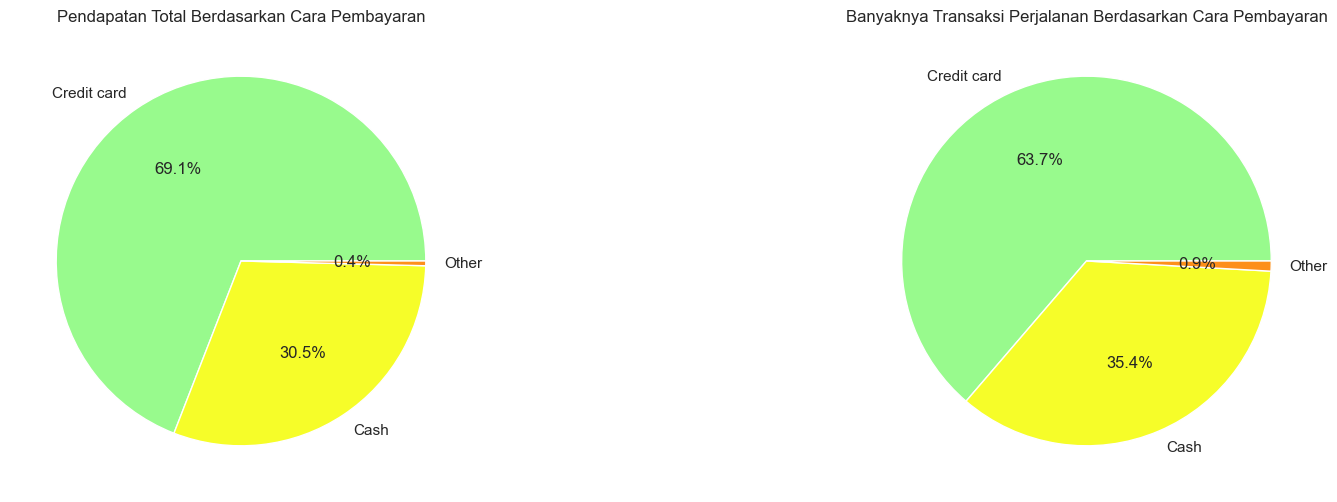

In [1297]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.pie(
    x = amount_payment_type['total_amount_SUM'],
    labels= amount_payment_type['payment_type'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"]
)
plt.title('Pendapatan Total Berdasarkan Cara Pembayaran')

plt.subplot(1,2,2)
plt.pie(
    x = amount_payment_type['total_amount_COUNT'],
    labels= amount_payment_type['payment_type'],
    autopct= '%.1f%%',
    colors= ["#98FA8D", "#F5FD08DD", "#FD8708ED"]
)
plt.title('Banyaknya Transaksi Perjalanan Berdasarkan Cara Pembayaran')

plt.show()

- **Pendapaan dan transaksi terbanyak berdasarkan `PU_Zone`**

In [1257]:
Total = df.groupby("PU_Zone")[["total_amount"]].sum().sort_values(by="total_amount", ascending= False).reset_index().head(10)
Banyaknya = df.groupby("PU_Zone")[["total_amount"]].count().sort_values(by="total_amount", ascending= False).reset_index().head(10)
amount_PU_Zone =  Total.merge(Banyaknya, left_on= "PU_Zone", right_on="PU_Zone", suffixes= ("_SUM", "_COUNT"))
amount_PU_Zone

,PU_Zone,total_amount_SUM,total_amount_COUNT
0,East Harlem North,247301.33,12918
1,East Harlem South,175151.94,8827
2,Morningside Heights,75269.09,3591
3,Forest Hills,71526.42,3798
4,Central Harlem,64908.75,3725
5,Central Park,63135.40,2849
6,Elmhurst,60155.25,2854
7,Washington Heights South,48969.20,1609
8,Fort Greene,45325.57,2126
9,Astoria,35672.52,1807


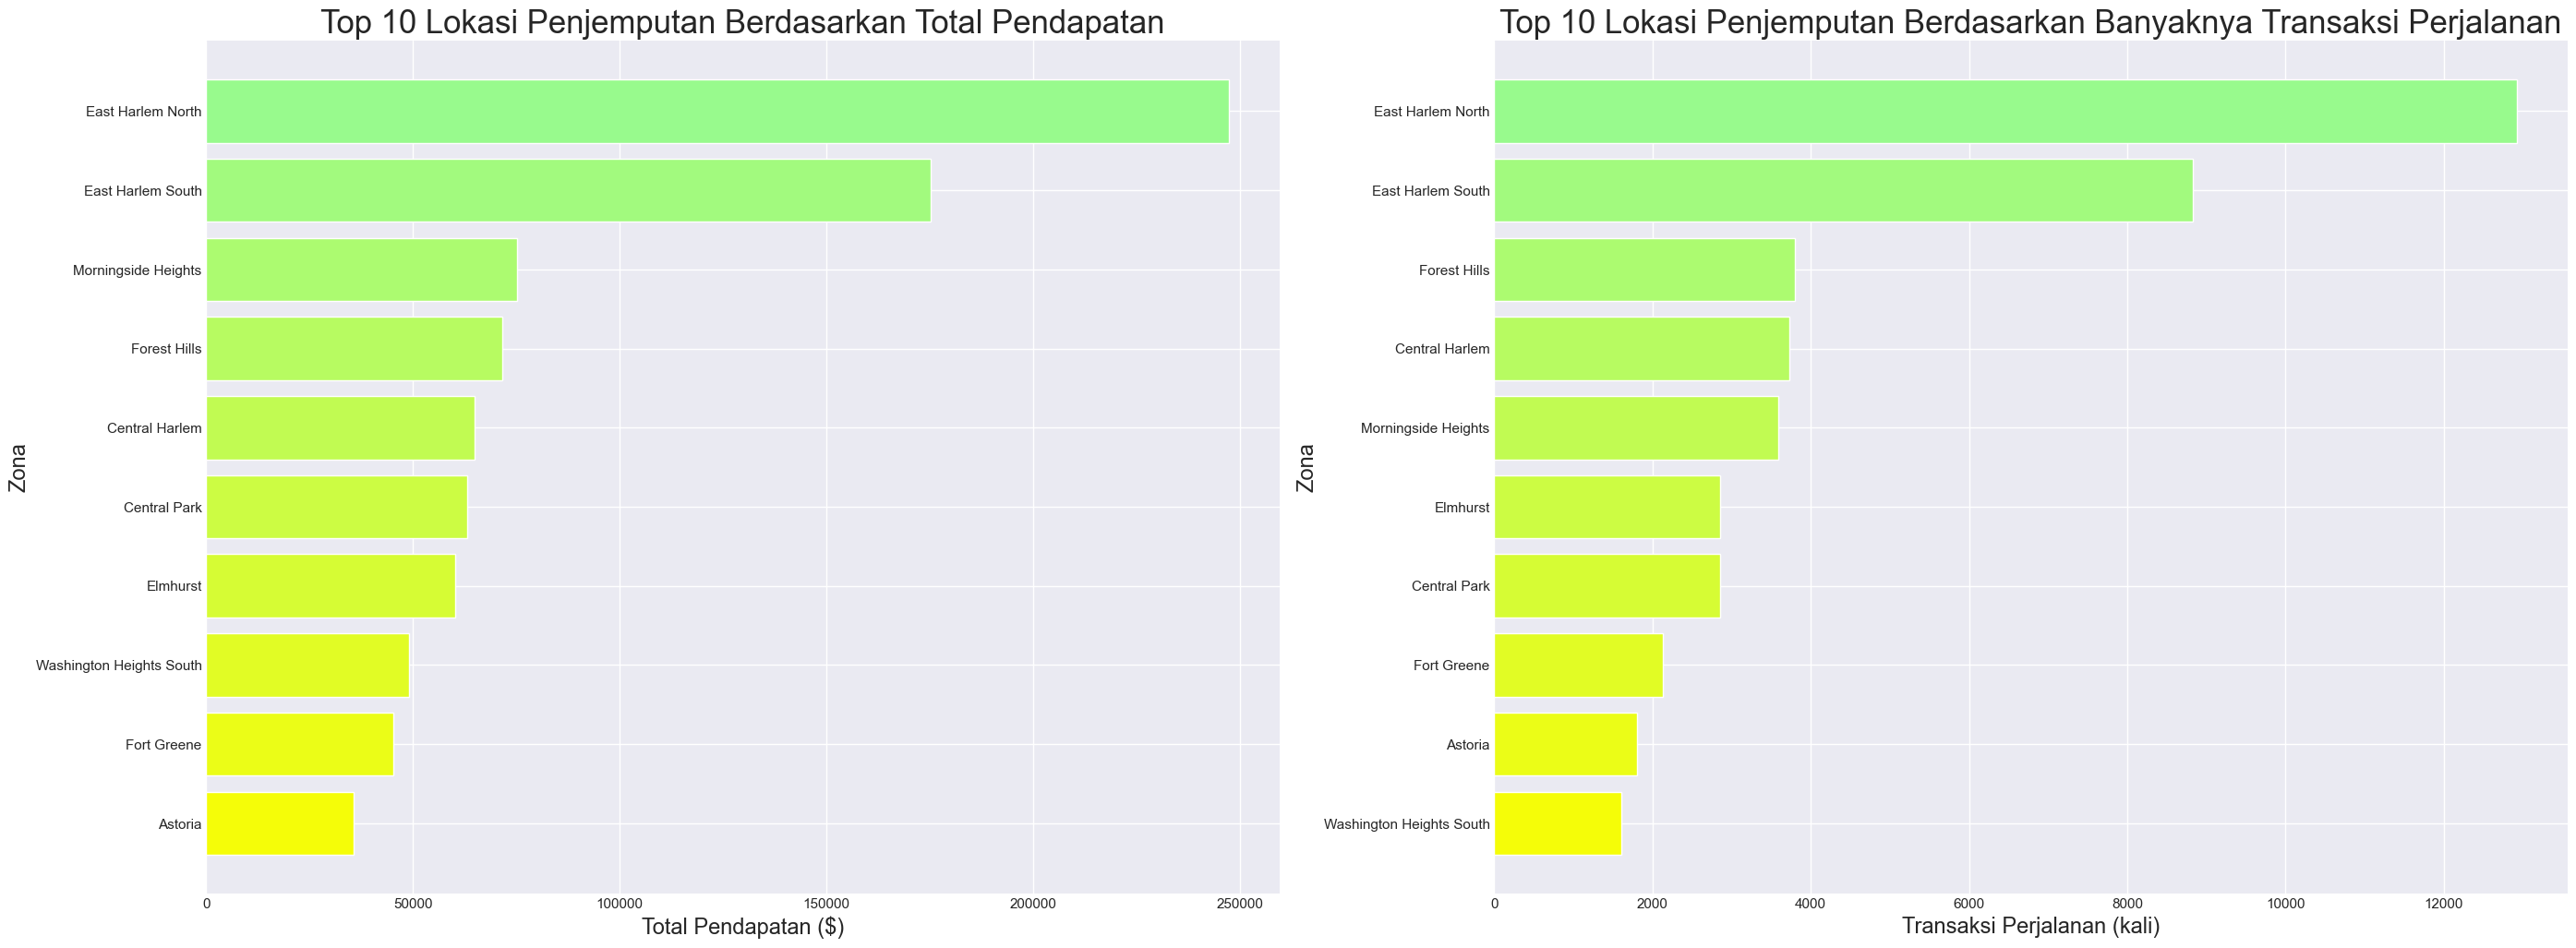

In [1305]:
plt.figure(figsize=(33,12))
plt.subplot(1,2,1)
plt.barh(y=amount_PU_Zone.sort_values(by='total_amount_SUM')['PU_Zone'],
         width=amount_PU_Zone.sort_values(by='total_amount_SUM')['total_amount_SUM'],
         color = sns.blend_palette([ "#F5FD08DD", "#98FA8D"], n_colors=10))

plt.title('Top 10 Lokasi Penjemputan Berdasarkan Total Pendapatan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Total Pendapatan ($)', fontsize=17)

plt.subplot(1,2,2)
plt.barh(y=amount_PU_Zone.sort_values(by='total_amount_COUNT')['PU_Zone'],
         width=amount_PU_Zone.sort_values(by='total_amount_COUNT')['total_amount_COUNT'],
         color=sns.blend_palette([ "#F5FD08DD", "#98FA8D"], n_colors=10))

plt.title('Top 10 Lokasi Penjemputan Berdasarkan Banyaknya Transaksi Perjalanan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Transaksi Perjalanan (kali)', fontsize=17)

plt.show()

Daerah penjemputan dengan total pendapatan tertinggi adalah East Herlem North sebesar 247301.33 dollar dengan 12918 transaksi perjalanan

- **Pendapaan dan transaksi terbanyak berdasarkan `DO_Zone`**

In [1259]:
Total = df.groupby("DO_Zone")[["total_amount"]].sum().sort_values(by="total_amount", ascending= False).reset_index().head(10)
Banyaknya = df.groupby("DO_Zone")[["total_amount"]].count().sort_values(by="total_amount", ascending= False).reset_index().head(10)
amount_DO_Zone =  Total.merge(Banyaknya, left_on= "DO_Zone", right_on="DO_Zone", suffixes= ("_SUM", "_COUNT"))
amount_DO_Zone

,DO_Zone,total_amount_SUM,total_amount_COUNT
0,Upper East Side North,51021.58,2654
1,East Harlem South,46202.96,3415
2,Upper West Side North,43209.06,2238
3,East Harlem North,41807.53,3297
4,Upper West Side South,34081.07,1402
5,Morningside Heights,32741.43,2179
6,Central Harlem,30612.31,2528
7,Yorkville West,30300.45,1511
8,Central Harlem North,30043.50,2246


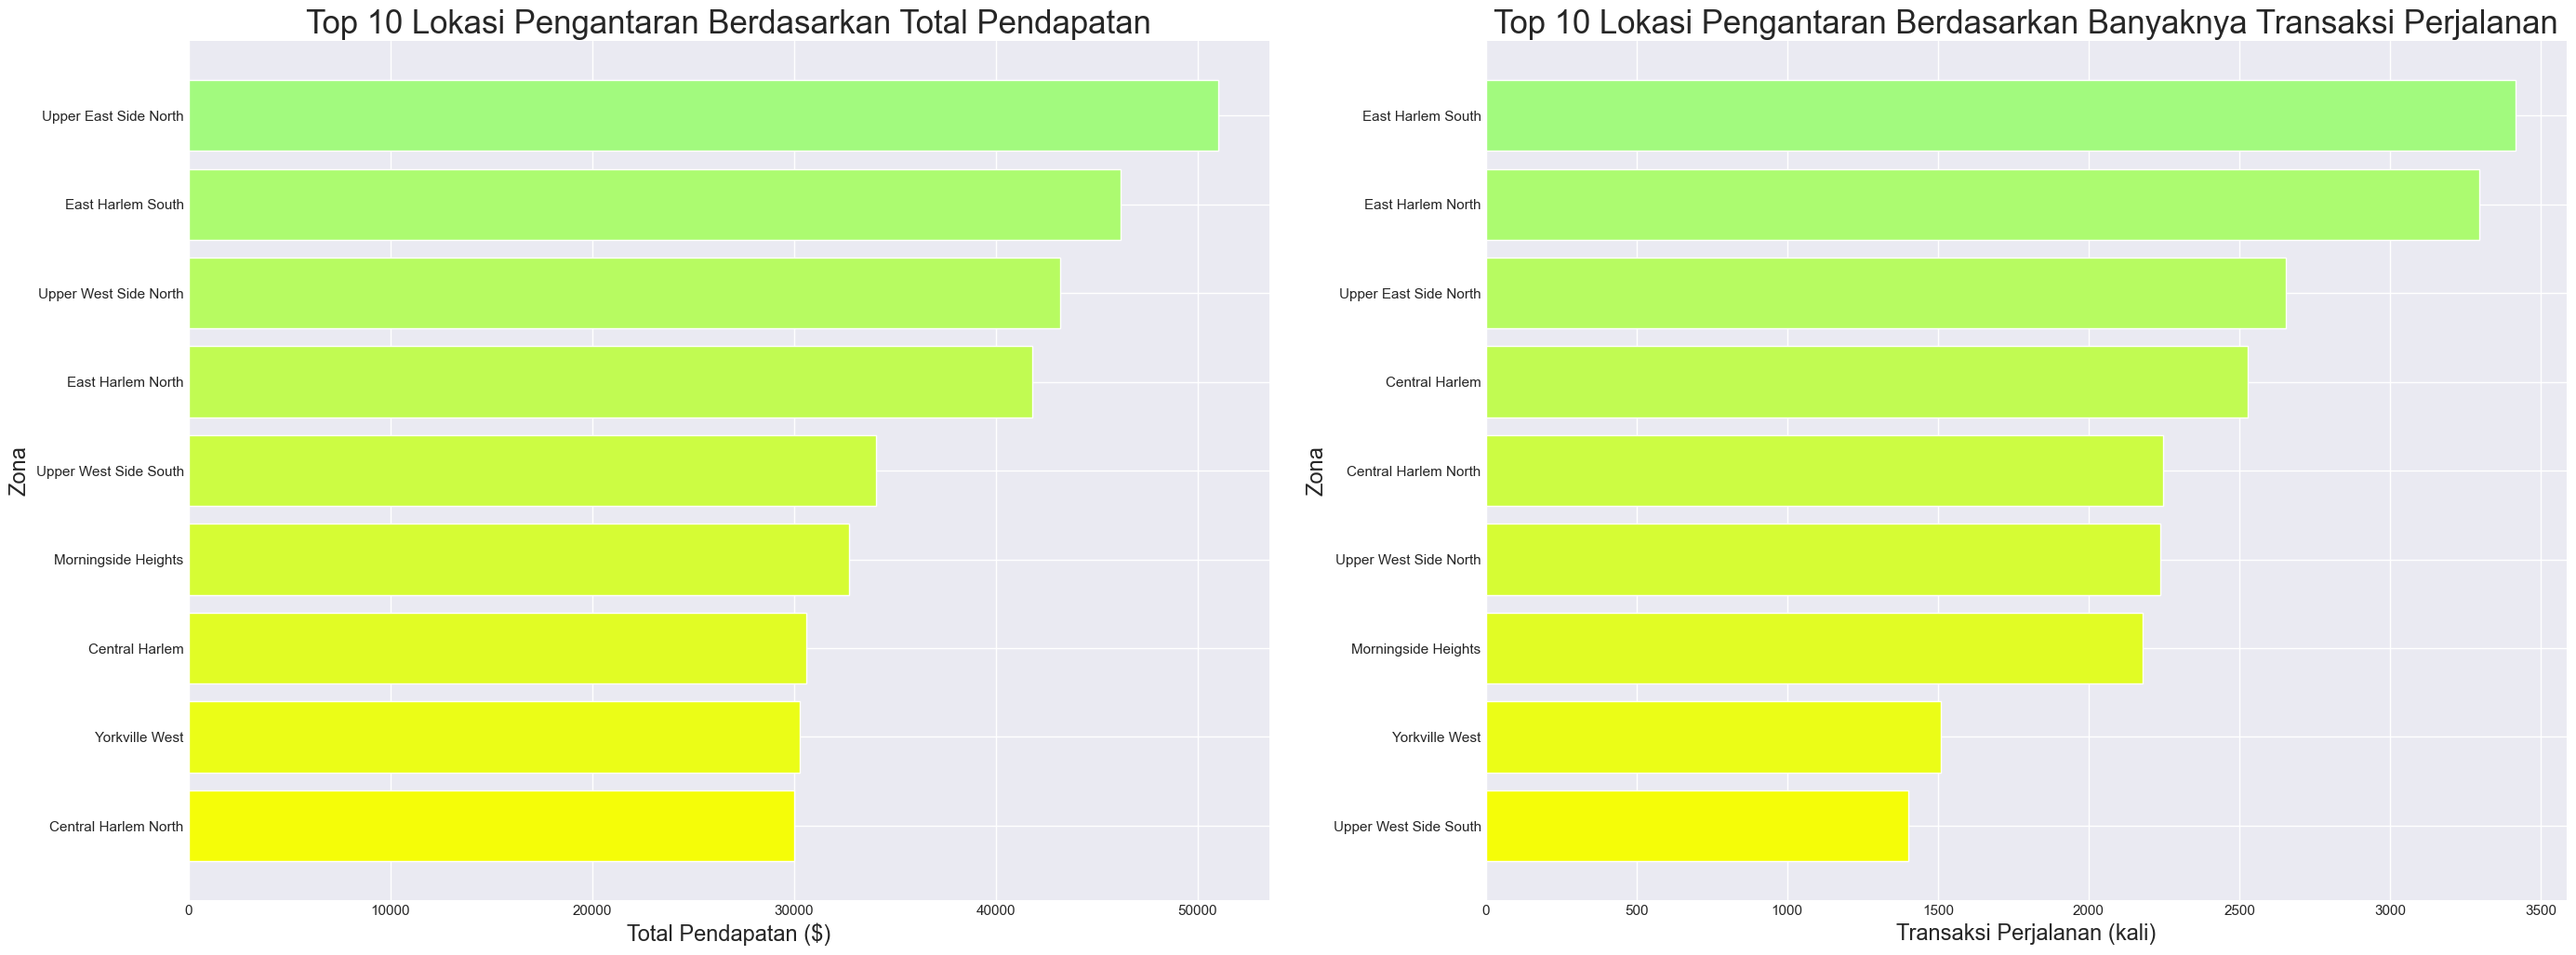

In [1315]:
plt.figure(figsize=(33,12))

plt.subplot(1,2,1)
plt.barh(y=amount_DO_Zone.sort_values(by='total_amount_SUM')['DO_Zone'],
         width=amount_DO_Zone.sort_values(by='total_amount_SUM')['total_amount_SUM'],
         color=sns.blend_palette([ "#F5FD08DD", "#98FA8D"], n_colors=10))
plt.title('Top 10 Lokasi Pengantaran Berdasarkan Total Pendapatan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Total Pendapatan ($)', fontsize=17)

plt.subplot(1,2,2)
plt.barh(y=amount_DO_Zone.sort_values(by='total_amount_COUNT')['DO_Zone'],
         width=amount_DO_Zone.sort_values(by='total_amount_COUNT')['total_amount_COUNT'],
         color=sns.blend_palette([ "#F5FD08DD", "#98FA8D"], n_colors=10))
plt.title('Top 10 Lokasi Pengantaran Berdasarkan Banyaknya Transaksi Perjalanan', fontsize=25)
plt.ylabel('Zona', fontsize=17)
plt.xlabel('Transaksi Perjalanan (kali)', fontsize=17)

plt.show()

Daerah pengantaran dengan total pendapatan tertinggi adalah Upper East Side North sebesar 51021.58 dollar dengan 2654 transaksi perjalanan

In [1261]:
df["DOday_name"] = df['lpep_dropoff_datetime'].dt.day_name()

In [1262]:
# Top 10 lokasi penjemputan
penjemputan = df.groupby(by=['PU_Zone'])[['total_amount']].count().reset_index().sort_values(by='total_amount', ascending=False).head(10)
penjemputan

,PU_Zone,total_amount
60,East Harlem North,12918
61,East Harlem South,8827
79,Forest Hills,3798
30,Central Harlem,3725
128,Morningside Heights,3591
67,Elmhurst,2854
32,Central Park,2849
80,Fort Greene,2126
1,Astoria,1807
197,Washington Heights South,1609


In [1263]:
# Top 10 lokasi pengantaran
pengantaran = df.groupby(by=['DO_Zone'])[['total_amount']].count().reset_index().sort_values(by='total_amount', ascending=False).head(10)
pengantaran

,DO_Zone,total_amount
67,East Harlem South,3415
66,East Harlem North,3297
218,Upper East Side North,2654
35,Central Harlem,2528
36,Central Harlem North,2246
220,Upper West Side North,2238
150,Morningside Heights,2179
86,Forest Hills,1595
244,Yorkville West,1511
221,Upper West Side South,1402


In [1264]:
# Dengan top 1 lokasi penjemputan kita lihat tujuan pengantarannya
trip = df.groupby(by=['PU_Zone','DO_Zone'])[['total_amount']].count().reset_index()
trip[trip['PU_Zone'] == 'East Harlem North'].sort_values(by='total_amount', ascending=False).head(10)

,PU_Zone,DO_Zone,total_amount
1595,East Harlem North,East Harlem South,1970
1678,East Harlem North,Upper East Side North,1165
1578,East Harlem North,Central Harlem,953
1644,East Harlem North,Morningside Heights,923
1594,East Harlem North,East Harlem North,806
1579,East Harlem North,Central Harlem North,730
1680,East Harlem North,Upper West Side North,690
1695,East Harlem North,Yorkville West,674
1580,East Harlem North,Central Park,629
1635,East Harlem North,Manhattan Valley,485


Diketahui zona penjemputan terbanyak dan mendapatkan penghasilan terbanyak adalah daerah `East Harlem North`. Tabel diatas merupakan top 10 perjalanan terbanyak dengan titik jemput di daerah `East Harlem North`.

In [1265]:

trip1 = df.groupby(['PUday_name', 'PU_Zone', "DO_Zone"])[['total_amount']].sum().reset_index().sort_values("total_amount", ascending= False)
trip1

,PUday_name,PU_Zone,DO_Zone,total_amount
9368,Tuesday,East Harlem North,East Harlem South,5707.37
7636,Thursday,East Harlem North,East Harlem South,4538.43
9415,Tuesday,East Harlem North,Upper East Side North,4531.54
11088,Wednesday,East Harlem North,East Harlem South,4248.21
2350,Monday,East Harlem North,Upper East Side North,4152.68
...,...,...,...,...
2254,Monday,East Concourse/Concourse Village,Central Park,0.00
9342,Tuesday,East Flatbush/Farragut,Erasmus,0.00
10582,Wednesday,Baisley Park,Baisley Park,0.00
2119,Monday,Corona,Woodside,0.00


In [1266]:

trip1[(trip1['PUday_name'] == 'Tuesday') & (df['PU_Zone'] == 'East Harlem North')].sort_values(by='total_amount', ascending=False).head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_27448\282271162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trip1[(trip1['PUday_name'] == 'Tuesday') & (df['PU_Zone'] == 'East Harlem North')].sort_values(by='total_amount', ascending=False).head(10)


,PUday_name,PU_Zone,DO_Zone,total_amount
9368,Tuesday,East Harlem North,East Harlem South,5707.37
9415,Tuesday,East Harlem North,Upper East Side North,4531.54
9417,Tuesday,East Harlem North,Upper West Side North,2526.36
9356,Tuesday,East Harlem North,Central Park,2286.58
9418,Tuesday,East Harlem North,Upper West Side South,2044.68
9455,Tuesday,East Harlem South,East Harlem South,1554.29
9425,Tuesday,East Harlem North,Yorkville East,1236.57
9564,Tuesday,Elmhurst,Jackson Heights,1008.54
9735,Tuesday,Fort Greene,Clinton Hill,883.52
9442,Tuesday,East Harlem South,Central Harlem North,838.80


Hari selasa menjadi hari yang paling banyak transaksi dan pendapatan tertinggi. Tabel di atas merupakan top 10 perjalanan di hari selasa dengan lokasi jemput di East Harlem North.

- **Pendapatan perhari & perminggu**

In [1267]:
# Melihat total seluruh pendapatan taksi hijau per minggu

PU_week_sum = df.groupby([df['lpep_pickup_datetime'].dt.to_period("W")])['total_amount'].sum().reset_index()
PU_week_sum['Week'] = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5','Week 6']
PU_week_sum

,lpep_pickup_datetime,total_amount,Week
0,2022-12-26/2023-01-01,28580.68,Week 1
1,2023-01-02/2023-01-08,283394.18,Week 2
2,2023-01-09/2023-01-15,311650.78,Week 3
3,2023-01-16/2023-01-22,295396.83,Week 4
4,2023-01-23/2023-01-29,319140.28,Week 5
5,2023-01-30/2023-02-05,91137.43,Week 6


In [1268]:
# Melihat banyaknya transaksi perjalanan taksi hijau per minggu

PU_week_ount = df.groupby([df['lpep_pickup_datetime'].dt.to_period("W")])['total_amount'].count().reset_index()
PU_week_ount['Week'] = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5','Week 6']
PU_week_ount

,lpep_pickup_datetime,total_amount,Week
0,2022-12-26/2023-01-01,1266,Week 1
1,2023-01-02/2023-01-08,13782,Week 2
2,2023-01-09/2023-01-15,14764,Week 3
3,2023-01-16/2023-01-22,14025,Week 4
4,2023-01-23/2023-01-29,15096,Week 5
5,2023-01-30/2023-02-05,4242,Week 6


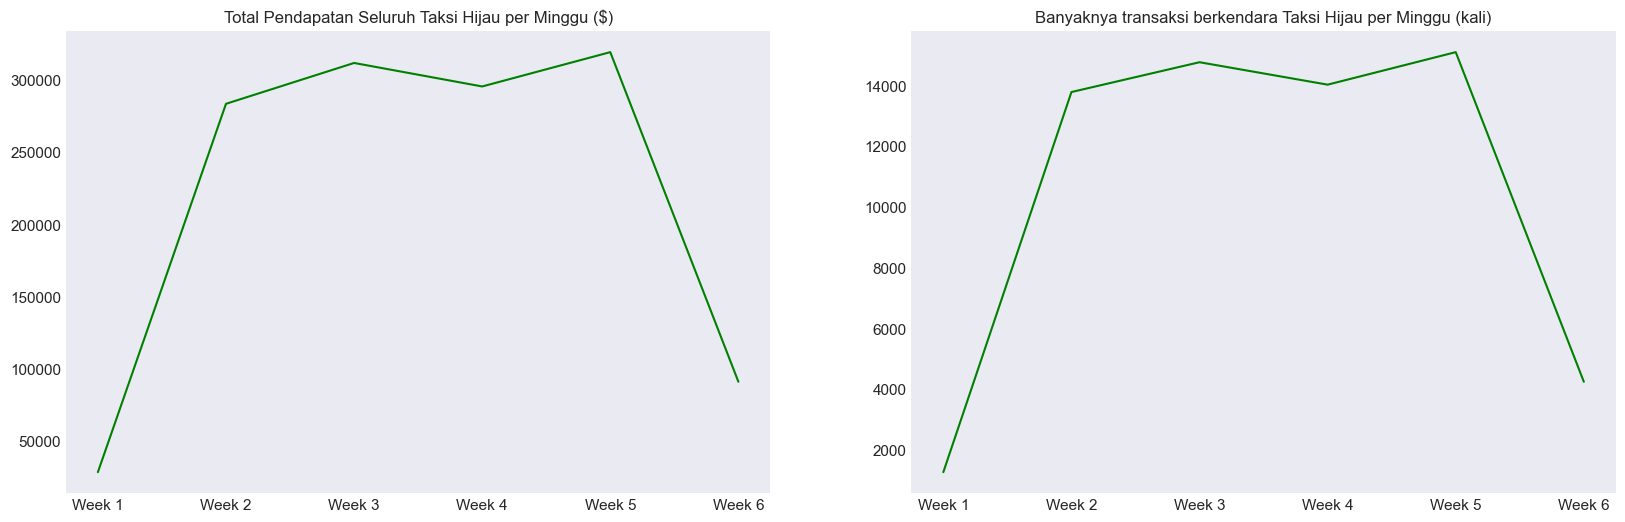

In [1310]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(PU_week_sum['Week'], PU_week_sum['total_amount'], color = "green")

plt.title('Total Pendapatan Seluruh Taksi Hijau per Minggu ($)')
plt.grid()


plt.subplot(1,2,2)
plt.plot(PU_week_ount['Week'], PU_week_ount['total_amount'],
         color ="green")

plt.title('Banyaknya transaksi berkendara Taksi Hijau per Minggu (kali)')
plt.grid()
plt.show()


Total pendapatan perminggu paling tinggi ada di pekan ke 5  sebesar $319,140

In [1270]:
# Melihat total seluruh pendapatan taksi hijau per hari

PU_day_sum = df.groupby([df['lpep_pickup_datetime'].dt.to_period("D")])['total_amount'].sum().reset_index()
PU_day_sum

,lpep_pickup_datetime,total_amount
0,2023-01-01,28580.68
1,2023-01-02,29569.20
2,2023-01-03,40093.15
3,2023-01-04,45094.92
4,2023-01-05,47414.31
5,2023-01-06,48743.14
6,2023-01-07,41186.63
7,2023-01-08,31292.83
8,2023-01-09,44061.31
9,2023-01-10,42552.52


In [1271]:
# Mengurutkan pendapatan perhari taksi hijau dari yang terbesar
PU_day_sum.sort_values(by='total_amount', ascending=False).head()

,lpep_pickup_datetime,total_amount
25,2023-01-26,53312.43
24,2023-01-25,52227.32
18,2023-01-19,51922.95
12,2023-01-13,50219.11
11,2023-01-12,49360.78


In [1272]:
PU_day_sum['lpep_pickup_datetime'] = PU_day_sum['lpep_pickup_datetime'].astype(str)

In [1273]:

# Melihat banyaknya transaksi taksi hijau per hari
PU_day_count = df.groupby([df['lpep_pickup_datetime'].dt.to_period("D")])['total_amount'].count().reset_index()
PU_day_count

,lpep_pickup_datetime,total_amount
0,2023-01-01,1266
1,2023-01-02,1442
2,2023-01-03,1963
3,2023-01-04,2236
4,2023-01-05,2220
5,2023-01-06,2365
6,2023-01-07,2003
7,2023-01-08,1553
8,2023-01-09,2083
9,2023-01-10,2024


In [1274]:
PU_day_count['lpep_pickup_datetime'] = PU_day_count['lpep_pickup_datetime'].astype(str)

In [ ]:
# Mengurutkan banyaknya transaksi perhari taksi hijau dari yang terbesar
PU_day_count.sort_values(by='total_amount', ascending=False).head()

,lpep_pickup_datetime,total_amount
25,2023-01-26,2476
24,2023-01-25,2475
18,2023-01-19,2416
5,2023-01-06,2365
11,2023-01-12,2345


Total pendapatan taksi akan naik di hari kerja, dan pendapatan tertinggi perhari ada di tanggal 26 sebesar $2476

In [1276]:
# Rata-rata pendapatan per hari semua taksi hijau
PU_day_count['total_amount'].mean()

np.float64(2037.9032258064517)

In [1277]:
# Rata-rata pendapatan per hari taksi hijau
PU_day_sum['total_amount'].mean()/960

np.float64(44.66734475806451)

In [1278]:

# Rata-rata perjalanan per armada (911)
PU_day_count['total_amount'].mean() / 911

np.float64(2.236995857087214)

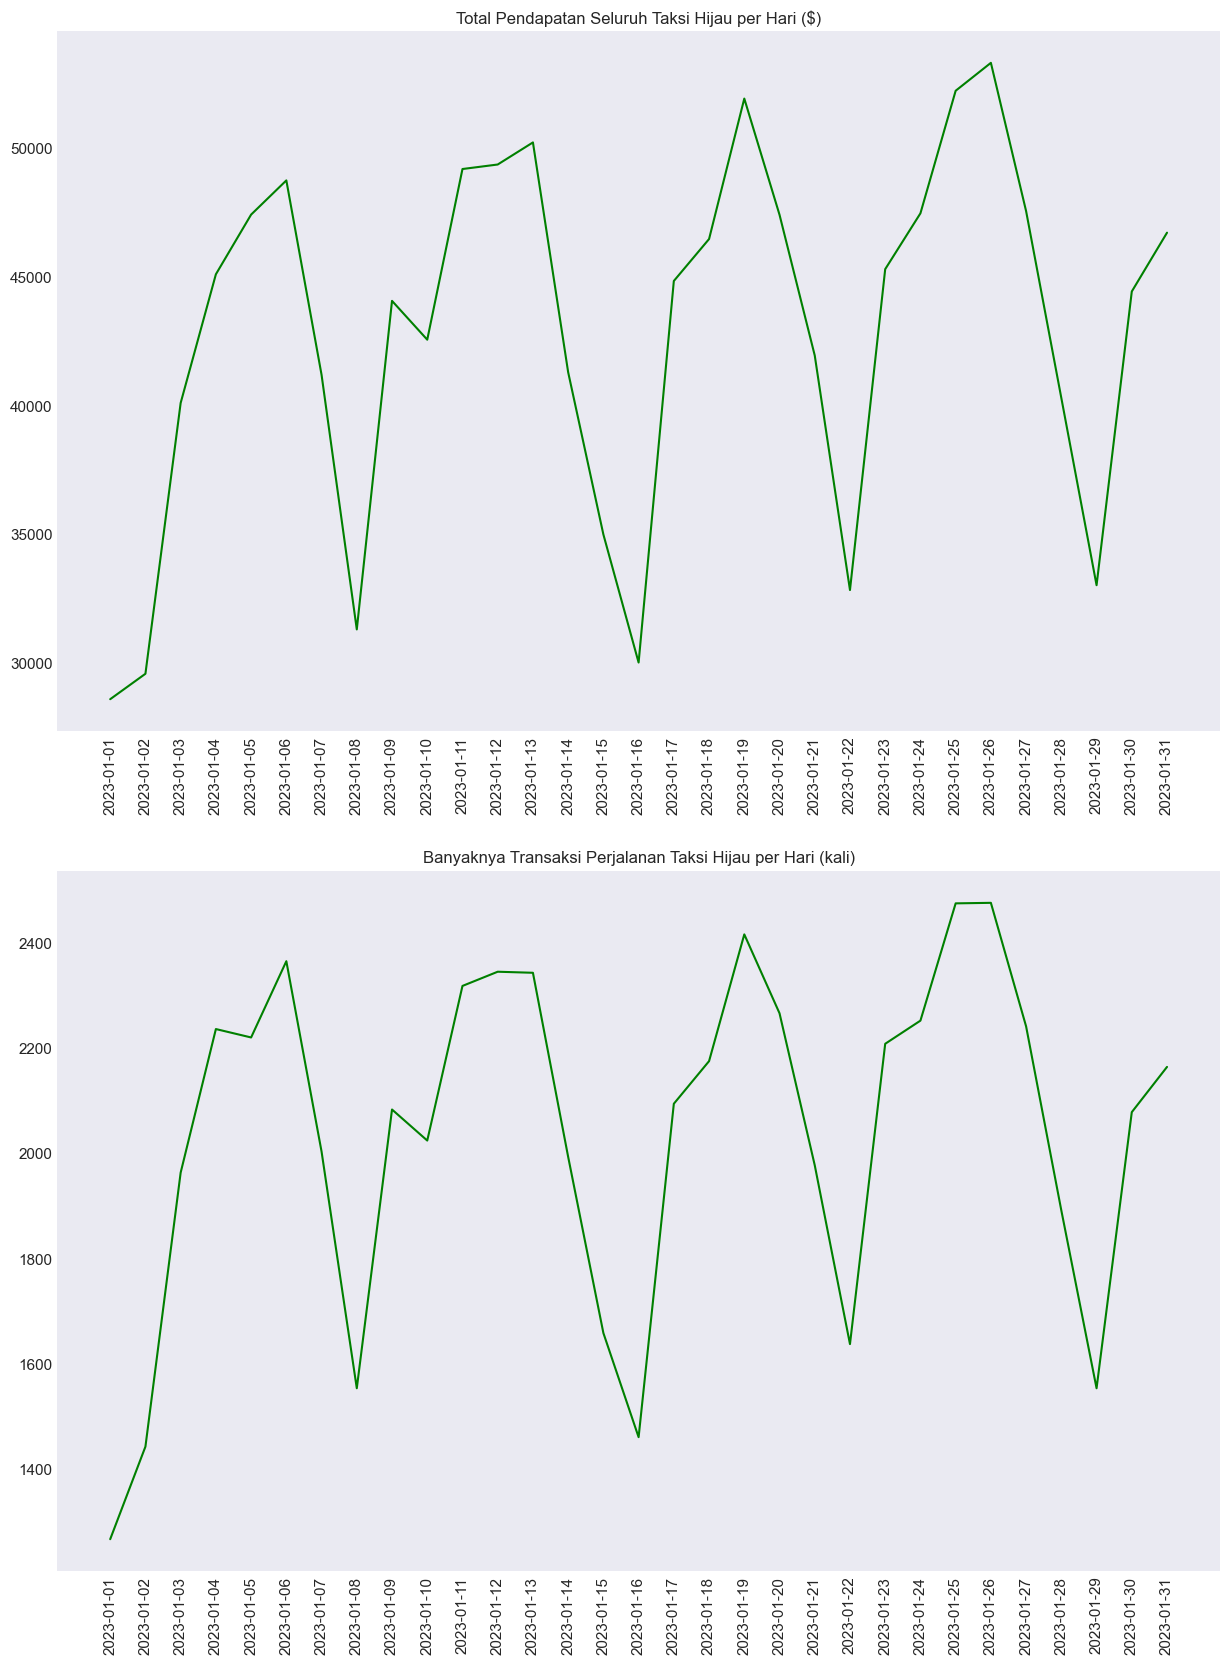

In [1312]:

# Grafik pendapatan dan banyaknya transaksi per hari
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
plt.plot(PU_day_sum['lpep_pickup_datetime'], PU_day_sum['total_amount'], color="green")

plt.title('Total Pendapatan Seluruh Taksi Hijau per Hari ($)')
plt.xticks(PU_day_sum['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.subplot(2,1,2)
plt.plot(PU_day_count['lpep_pickup_datetime'], PU_day_count['total_amount'], color= "green")

plt.title('Banyaknya Transaksi Perjalanan Taksi Hijau per Hari (kali)')
plt.xticks(PU_day_count['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.show()

Total pendapatan taksi akan naik di hari kerja, dan pendapatan tertinggi perhari ada di tanggal 26 sebesar $2476

In [1280]:
# Melihat total pendapatan dengan periode harian

PU_name_sum = df.groupby([df['lpep_pickup_datetime'].dt.day_name()])['total_amount'].sum().reset_index().sort_values(by='lpep_pickup_datetime')

PU_name_sum["urutan"] = [5,1,6,7,4,2,3]
PU_name_sum = PU_name_sum.sort_values(by="urutan")
PU_name_sum

,lpep_pickup_datetime,total_amount,urutan
1,Monday,193355.07,1
5,Tuesday,221655.86,2
6,Wednesday,192972.70,3
4,Thursday,202010.47,4
0,Friday,193917.62,5
2,Saturday,164697.94,6
3,Sunday,160690.52,7


In [1281]:
# Melihat banyaknya transaksi dengan periode harian
PU_name_count = df.groupby([df['lpep_pickup_datetime'].dt.day_name()])['total_amount'].count().reset_index().sort_values(by='lpep_pickup_datetime')

PU_name_count["urutan"] = [5,1,6,7,4,2,3]
PU_name_count = PU_name_count.sort_values(by="urutan")
PU_name_count


,lpep_pickup_datetime,total_amount,urutan
1,Monday,9271,1
5,Tuesday,10497,2
6,Wednesday,9204,3
4,Thursday,9457,4
0,Friday,9215,5
2,Saturday,7864,6
3,Sunday,7667,7


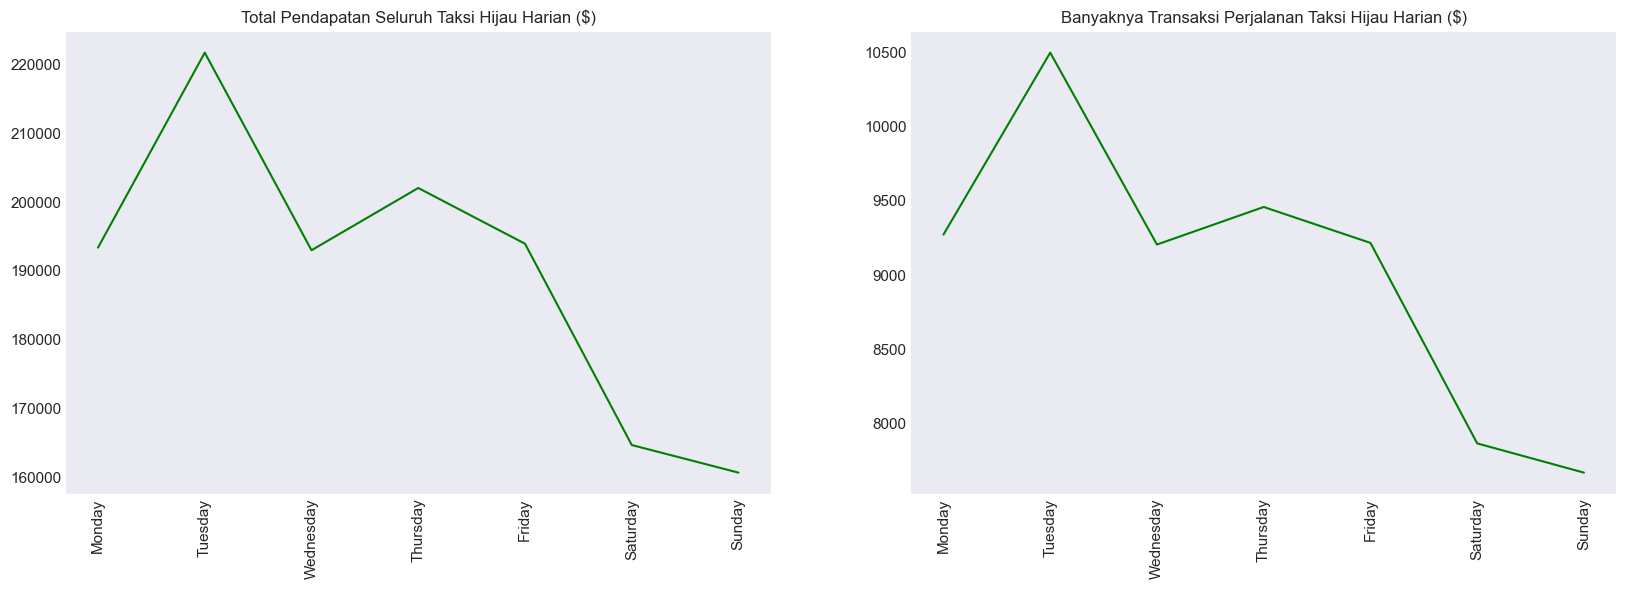

In [1314]:
# Membuat grafik dengan total pendapatan dan transaksi perjalanan periode harian
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(PU_name_sum['lpep_pickup_datetime'],PU_name_sum['total_amount'], color = "green")

plt.title('Total Pendapatan Seluruh Taksi Hijau Harian ($)')
plt.xticks(PU_name_sum['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.subplot(1,2,2)
plt.plot(PU_name_count['lpep_pickup_datetime'],PU_name_count['total_amount'], color = "green")

plt.title('Banyaknya Transaksi Perjalanan Taksi Hijau Harian ($)')
plt.xticks(PU_name_count['lpep_pickup_datetime'], rotation=90)
plt.grid()


plt.show()

Total pendapatan tertinggi perbulan ada di hari selasa $221,655

In [1283]:
# Simpan file to csv

df.to_csv('C:/Users/HP/Downloads/Projek Modul 2/NYC_databersih.csv', index = None, header=True)